# DAI-Assignment

##### **Name**:- *Ginjala Srivardhan*
##### **Enrollment number**:- *23114028*
##### **Batch**:- *CS1*

### Tasks:-

**1. Data Cleaning:**
- Load the dataset and inspect its structure.
- Handle missing values using imputation or removal techniques.
- Identify and remove duplicate records.
- Detect and treat outliers using appropriate statistical methods.
- Standardize categorical values (e.g., fixing typos or formatting inconsistencies).


**2. EDA**
##### *Univariate Analysis (Single-Variable Exploration)*
- Summary statistics (mean, median, mode, variance, skewness, etc.).
- Frequency distributions for categorical variables.
- Histograms and box plots to visualize distributions.
##### *Bivariate Analysis (Two-Variable Exploration)*
- Correlation matrix to identify relationships between numerical variables.
- Scatter plots for continuous variable relationships.
- Bar plots, violin plots, and box plots to compare categorical and numerical variables.
##### *Multivariate Analysis (Multiple Variables Exploration)*
- Pair plots to analyze multiple relationships simultaneously.
- Heatmaps to visualize correlations among multiple variables.
- Grouped comparisons to identify combined effects of multiple features.

### ***Dataset chosen:- NBA Players dataset***

<img src="nba.jpeg" width="504">

##### Source:- https://www.kaggle.com/datasets/justinas/nba-players-data

In [1]:
# Load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data:- 

df = pd.read_csv('all_seasons.csv')
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [3]:
# Check the shape of the data
df.shape

(12844, 22)

In [4]:
# Let's remove the Unnamed: 0 column as it is not required
df = df.drop('Unnamed: 0', axis=1)

In [5]:
# Inspect the data:-

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12844 non-null  object 
 1   team_abbreviation  12844 non-null  object 
 2   age                12844 non-null  float64
 3   player_height      12844 non-null  float64
 4   player_weight      12844 non-null  float64
 5   college            10990 non-null  object 
 6   country            12844 non-null  object 
 7   draft_year         12844 non-null  object 
 8   draft_round        12844 non-null  object 
 9   draft_number       12844 non-null  object 
 10  gp                 12844 non-null  int64  
 11  pts                12844 non-null  float64
 12  reb                12844 non-null  float64
 13  ast                12844 non-null  float64
 14  net_rating         12844 non-null  float64
 15  oreb_pct           12844 non-null  float64
 16  dreb_pct           128

In [6]:
# Observe the data:-
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [7]:
# Check the number of unique values in each column:-
df.nunique().sort_values()

draft_round             9
age                    27
season                 27
player_height          30
team_abbreviation      36
draft_year             48
draft_number           76
country                82
gp                     85
ast                   115
reb                   153
player_weight         157
oreb_pct              216
pts                   319
usg_pct               348
dreb_pct              352
college               356
ast_pct               483
ts_pct                563
net_rating            772
player_name          2551
dtype: int64

In [8]:
# Identify the columns with missing values, and print the percentage of missing values in each column:-
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values_percentage = missing_values / len(df) * 100
missing_values_table = pd.concat([missing_values, missing_values_percentage], axis=1)
missing_values_table = missing_values_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
missing_values_table = missing_values_table.sort_values(by='% of Total Values', ascending=False)
print(missing_values_table)

         Missing Values  % of Total Values
college            1854          14.434756


In [9]:
# Let's handle the missing values:-
# Since the missing values are more than 5%, we can fill them with the:-
# - Mean value for the numerical columns
# - Mode value for the categorical column
# Here, we choose not to drop the missing values, considering the size of the dataset, and information loss involved.
# Also, since there is only one categorical column 'college' with missing values, we can fill it with the mode value.
# Although the numerical columns do not have missing values, we will fill them with the mean value for demonstration purposes.

# Separate the numerical and categorical columns:-
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

# Fill the missing values in numerical columns with the mean value:-
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill the missing values in categorical columns with the mode value:-
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Check for missing values:-
df.isnull().sum()

player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [10]:
# Let's identify and remove the duplicate rows:-
# Check for duplicate rows:-

duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape) # Number of duplicate rows:  (0, 7)

# Clearly, there are no duplicate rows in the dataset.

Number of duplicate rows:  (0, 21)


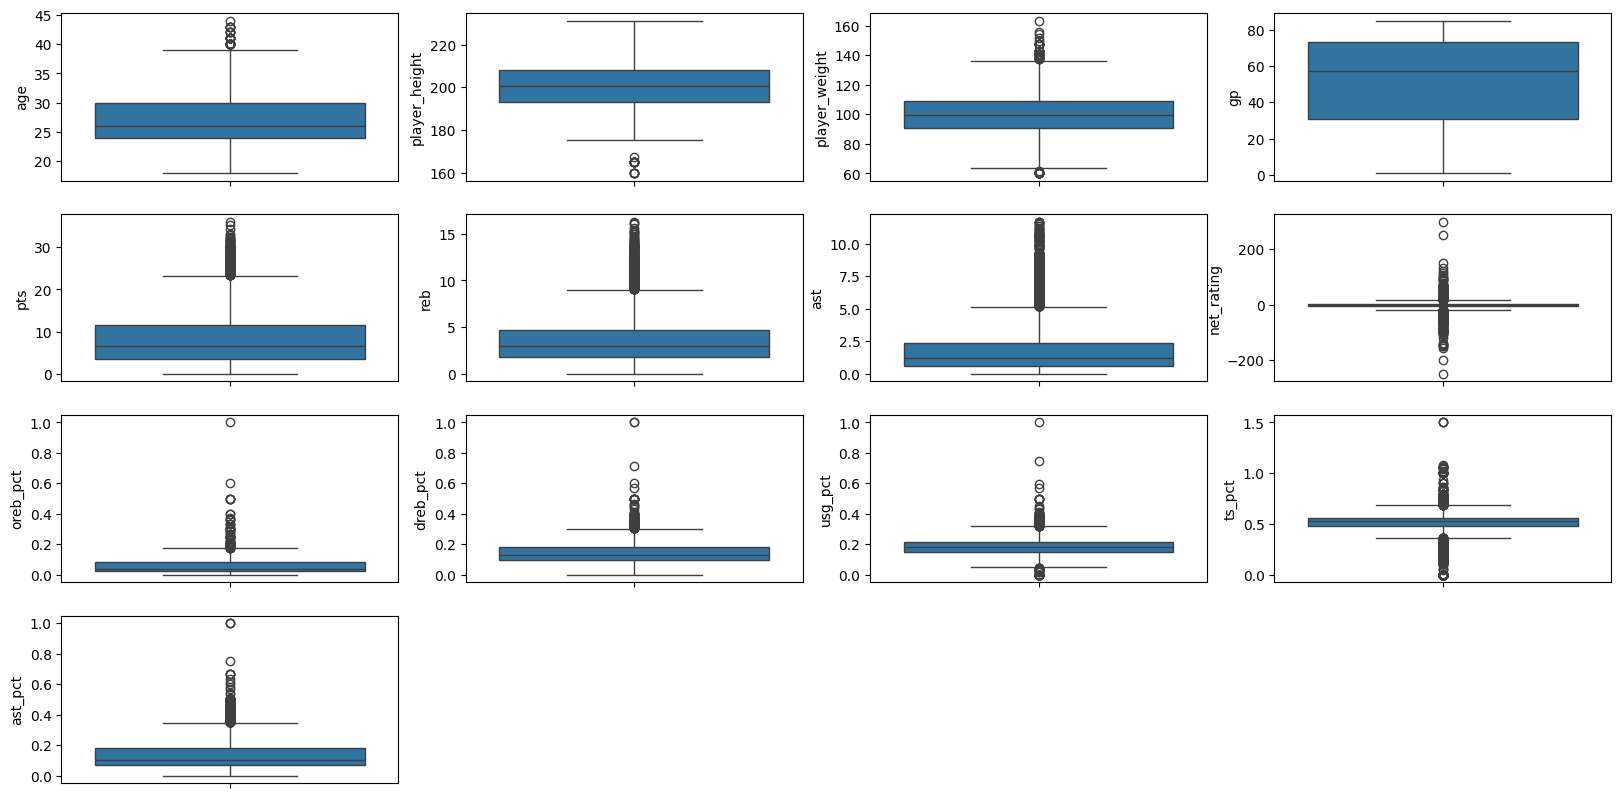

In [11]:
# Let's detect and remove the outliers:-
# Detect the outliers:-
# We will use boxplots for each numerical column to detect the outliers.

plt.figure(figsize=(20, 10))

i = 1

for col in num_cols:
    plt.subplot(4, 4, i)
    sns.boxplot(df[col])
    i = i + 1
    
plt.show()



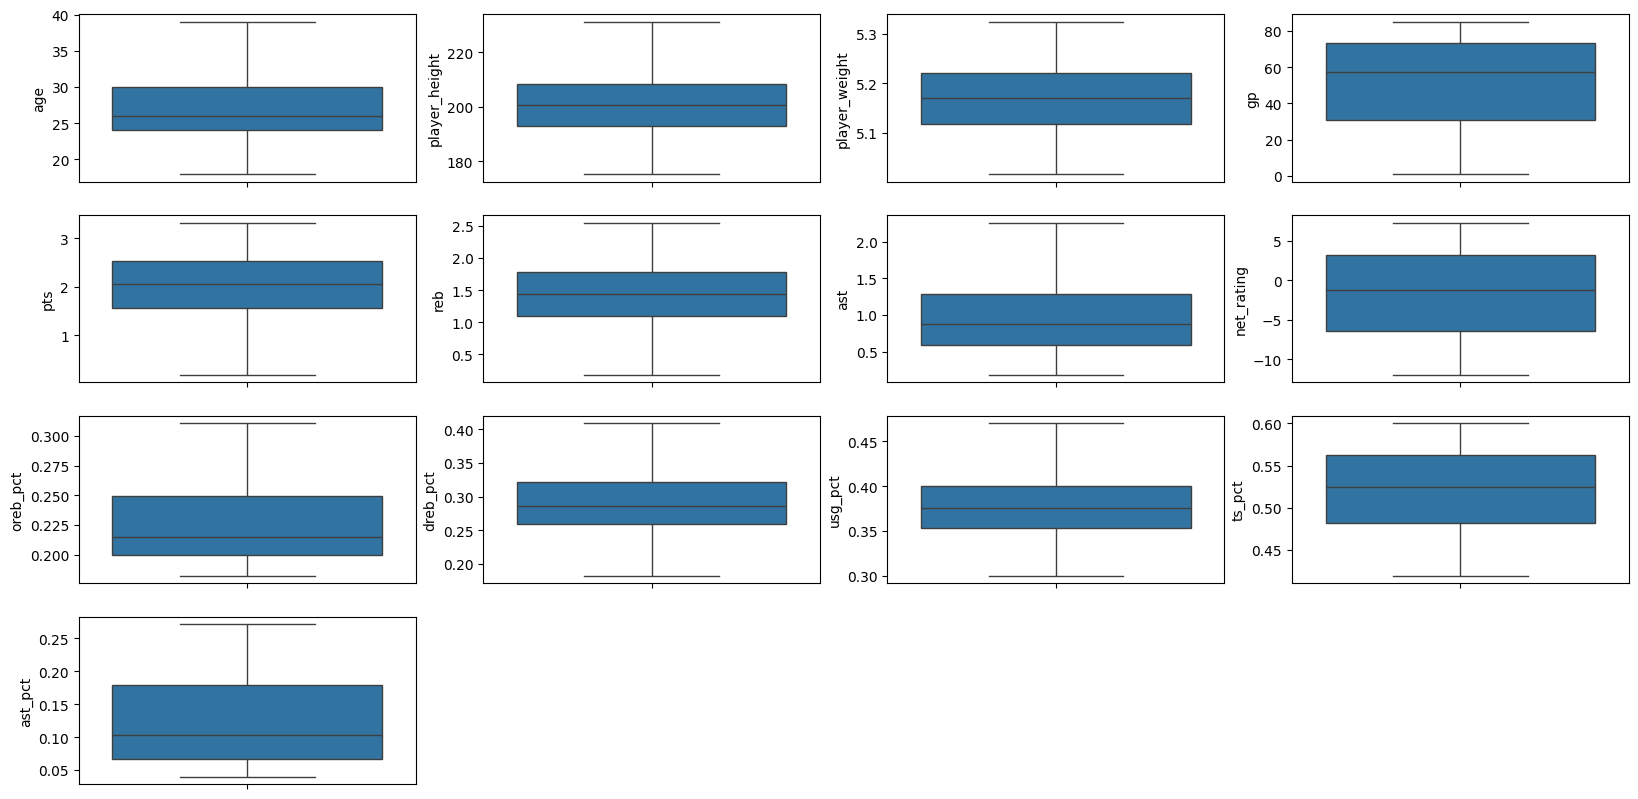

In [12]:
# Clearly, there are outliers almost everywhere, but are relatively small in the columns age, player_height, and negligible in the gp column.
# The other columns like player_weight, pts, reb, ast, net_rating, oreb_pct and similar pct's have a significant number of outliers.
# Hence, we will deal with both the types of outliers in a slightly different manner.

# For the age, player_height, and gp columns, we will use median imputation to handle the outliers, as they are relatively less,
# and median imputation will not affect the data distribution significantly.
# For the other columns, we will still use median imputation, but will add percentile capping along with log transformation,
# to handle the significant number of outliers, as removing them would result in a significant loss of data.

# Handling the age, player_height, and gp columns:-
# Median Imputation for fewer outliers, with a threshold of 1.5 times the IQR
for col in ["age", "player_height", "gp"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replacing both lower and upper outliers with the median
    median_value = df[col].median()
    df[col] = np.where((df[col] > upper_bound) | (df[col] < lower_bound), 
                       median_value, df[col])

# Handling the player_weight, pts, reb, ast, net_rating, and oreb_pct columns:-
# Median Imputation with Percentile Capping, followed by Log Transformation, for significant outliers
# Specially for the net_rating, ts_pct and ast_pct columns, we will need winsorization with a large limit to handle the wide range of outliers.
for col in ["player_weight", "pts", "reb", "ast", "net_rating", "oreb_pct", "dreb_pct", "usg_pct", "ts_pct", "ast_pct"]:
    
    if col != "net_rating" and col != "ts_pct" and col != "ast_pct":
        lower_bound = df[col].quantile(0.01)  # 1st percentile
        upper_bound = df[col].quantile(0.99)  # 99th percentile
        
        df[col] = np.clip(df[col], lower_bound, upper_bound)  # Clip outliers
        
        # Log Transformation
        shift_value = 1.2 + abs(np.min(df[col])) # Shift all values by a positive constant to handle zero and negative values
        df[col] = np.log(df[col] + shift_value)
        
    else:
        from scipy.stats.mstats import winsorize
        df[col] = winsorize(df[col], limits=[0.1, 0.1]) # Winsorize the net_rating column with a large limit
        


# Let's check the boxplots again to see if the outliers have been handled:-
plt.figure(figsize=(20, 10))

i = 1
for col in num_cols:
    plt.subplot(4, 4, i)
    sns.boxplot(df[col])
    i = i + 1



In [13]:
# Clearly, the outliers have been handled effectively, and the data distribution has been maintained as well.
# Now Let's standardize the categorical values, like typos, etc if needed.

# Standardize the categorical values:-
# Check the unique values in the categorical columns, and print in sorted order:-

for col in cat_cols:
    print(f"Unique values in {col} are: {sorted(df[col].unique())}")
    print("\n")
    
    

Unique values in player_name are: ['A.C. Green', 'A.J. Bramlett', 'A.J. Guyton', 'A.J. Lawson', 'AJ Green', 'AJ Griffin', 'AJ Hammons', 'AJ Price', 'Aaron Brooks', 'Aaron Gordon', 'Aaron Gray', 'Aaron Harrison', 'Aaron Henry', 'Aaron Holiday', 'Aaron Jackson', 'Aaron McKie', 'Aaron Miles', 'Aaron Nesmith', 'Aaron Wiggins', 'Aaron Williams', 'Abdel Nader', 'Acie Earl', 'Acie Law', 'Adam Harrington', 'Adam Keefe', 'Adam Mokoka', 'Adam Morrison', 'Ade Murkey', 'Admiral Schofield', 'Adonal Foyle', 'Adonis Jordan', 'Adonis Thomas', 'Adreian Payne', 'Adrian Caldwell', 'Adrian Griffin', 'Ahmad Caver', 'Al Harrington', 'Al Horford', 'Al Jefferson', 'Al Thornton', 'Al-Farouq Aminu', 'Alan Anderson', 'Alan Henderson', 'Alan Williams', 'Alando Tucker', 'Alec Burks', 'Alec Peters', 'Aleem Ford', 'Alekesej Pokusevski', 'Aleksandar Djordjevic', 'Aleksandar Radojevic', 'Aleksej Pokusevski', 'Alen Smailagic', 'Alex Abrines', 'Alex Acker', 'Alex Caruso', 'Alex Garcia', 'Alex Kirk', 'Alex Len', 'Alex Po

In [14]:
# Clearly, the columns 'college', 'country' have couple of typos, otherwise the data is clean.
# We will standardize these typos in the next step.

# Standardize the typos in the 'college' and 'country' columns:-
# Standardization dictionaries
college_mapping = {
    "California-Berkeley": "University of California, Berkeley",
    "Miami (FL)": "University of Miami",
    "Miami (Fla.)": "University of Miami",
    "Louisana-Lafayette": "Louisiana-Lafayette",
    "Wisconsin-Green Bay": "University of Wisconsin-Green Bay",
    "Virginia Tech ": "Virginia Tech"  # Removing trailing space
}

country_mapping = {
    "Bosnia": "Bosnia and Herzegovina",
    "Bosnia & Herzegovina": "Bosnia and Herzegovina",
    "Bosnia and Herzegovina": "Bosnia and Herzegovina",
    "Congo": "Democratic Republic of the Congo",
    "Republic of the Congo": "Democratic Republic of the Congo",
    "Democratic Republic of the Congo": "Democratic Republic of the Congo",
    "DRC": "Democratic Republic of the Congo",
    "US Virgin Islands": "United States Virgin Islands",
    "U.S. Virgin Islands": "United States Virgin Islands",
    "Serbia and Montenegro": "Serbia",
    "Sudan (UK)": "Sudan",
    "USA": "United States"
}

# Apply cleaning
df["college"] = df["college"].str.strip().replace(college_mapping)
df["country"] = df["country"].replace(country_mapping)

# Remove empty or whitespace-only college names
df["college"] = df["college"].replace(r"^\s*$", "Unknown", regex=True)

# Check the unique values in the 'college' and 'country' columns after standardization:-
print(f"Unique values in college are: {sorted(df['college'].unique())}")
print("\n")
print(f"Unique values in country are: {sorted(df['country'].unique())}")



Unique values in college are: ['Alabama', 'Alabama A&M', 'Alabama Huntsville', 'Alabama-Birmingham', 'Albany State (GA)', 'American International', 'American University', 'Arizona', 'Arizona St.', 'Arizona State', 'Arkansas', 'Arkansas-Little Rock', 'Auburn', 'Auburn-Montgomery', 'Augsburg', 'Augusta State', 'Augustana (SD)', 'Austin Peay', 'Ball State', 'Barton Community College', 'Baylor', 'Belmont', 'Blinn', 'Boise State', 'Boston College', 'Boston U.', 'Bowling Green', 'Bradley', 'Brigham Young', 'Brigham Young-Hawaii', 'Bucknell', 'Buffalo', 'Butler', 'Butler Community College', 'Cal Poly', 'Cal State-Bakersfield', 'Cal State-Fullerton', 'Cal State-Long Beach', 'Cal State-San Bernardino', 'Cal-Davis', 'Cal-Santa Barbara', 'California', 'California State-Long Beach', 'California-Irvine', 'California-Los Angeles', 'California-Santa Barbara', 'Campbell University', 'Centenary (LA)', 'Central Arkansas', 'Central Connecticut State', 'Central Florida', 'Central Michigan', 'Central Oklah

### Now that the Data Cleaning is complete, Let's dive into the Exploratory Data Analysis part, where we perform:-
**Univariate Analysis (Single-Variable Exploration)**
- Summary statistics (mean, median, mode, variance, skewness, etc.).
- Frequency distributions for categorical variables.
- Histograms and box plots to visualize distributions.

**Bivariate Analysis (Two-Variable Exploration)**
- Correlation matrix to identify relationships between numerical variables.
- Scatter plots for continuous variable relationships.
- Bar plots, violin plots, and box plots to compare categorical and numerical variables.

**Multivariate Analysis (Multiple Variables Exploration)**
- Pair plots to analyze multiple relationships simultaneously.
- Heatmaps to visualize correlations among multiple variables.
- Grouped comparisons to identify combined effects of multiple features.

In [15]:
# Let's Start with the Univariate Analysis:-
# Univariate Analysis of Numerical Columns:-
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,26.991514,200.609480,5.169644,51.154158,2.031053,1.434401,0.968503,-1.700335,0.225412,0.291671,0.377527,0.519486,0.127057
std,4.259474,9.000697,0.069016,25.084904,0.673813,0.498065,0.497727,6.095660,0.031453,0.043958,0.034514,0.055792,0.075496
min,18.000000,175.260000,5.016520,1.000000,0.182322,0.182322,0.182322,-12.000000,0.182322,0.182322,0.300105,0.419000,0.040000
25%,24.000000,193.040000,5.116562,31.000000,1.568616,1.098612,0.587787,-6.400000,0.199670,0.259283,0.353470,0.482000,0.066000
50%,26.000000,200.660000,5.169534,57.000000,2.066863,1.435085,0.875469,-1.300000,0.215111,0.285555,0.375693,0.525000,0.103000
75%,30.000000,208.280000,5.219841,73.000000,2.541602,1.774952,1.280934,3.200000,0.249201,0.321359,0.400118,0.563000,0.179000
max,39.000000,231.140000,5.324552,85.000000,3.325036,2.549445,2.261763,7.300000,0.310422,0.408793,0.470004,0.600000,0.271000


In [16]:
print("The numerical columns are: ", num_cols)
print("The categorical columns are: ", cat_cols)


The numerical columns are:  Index(['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'],
      dtype='object')
The categorical columns are:  Index(['player_name', 'team_abbreviation', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'season'],
      dtype='object')


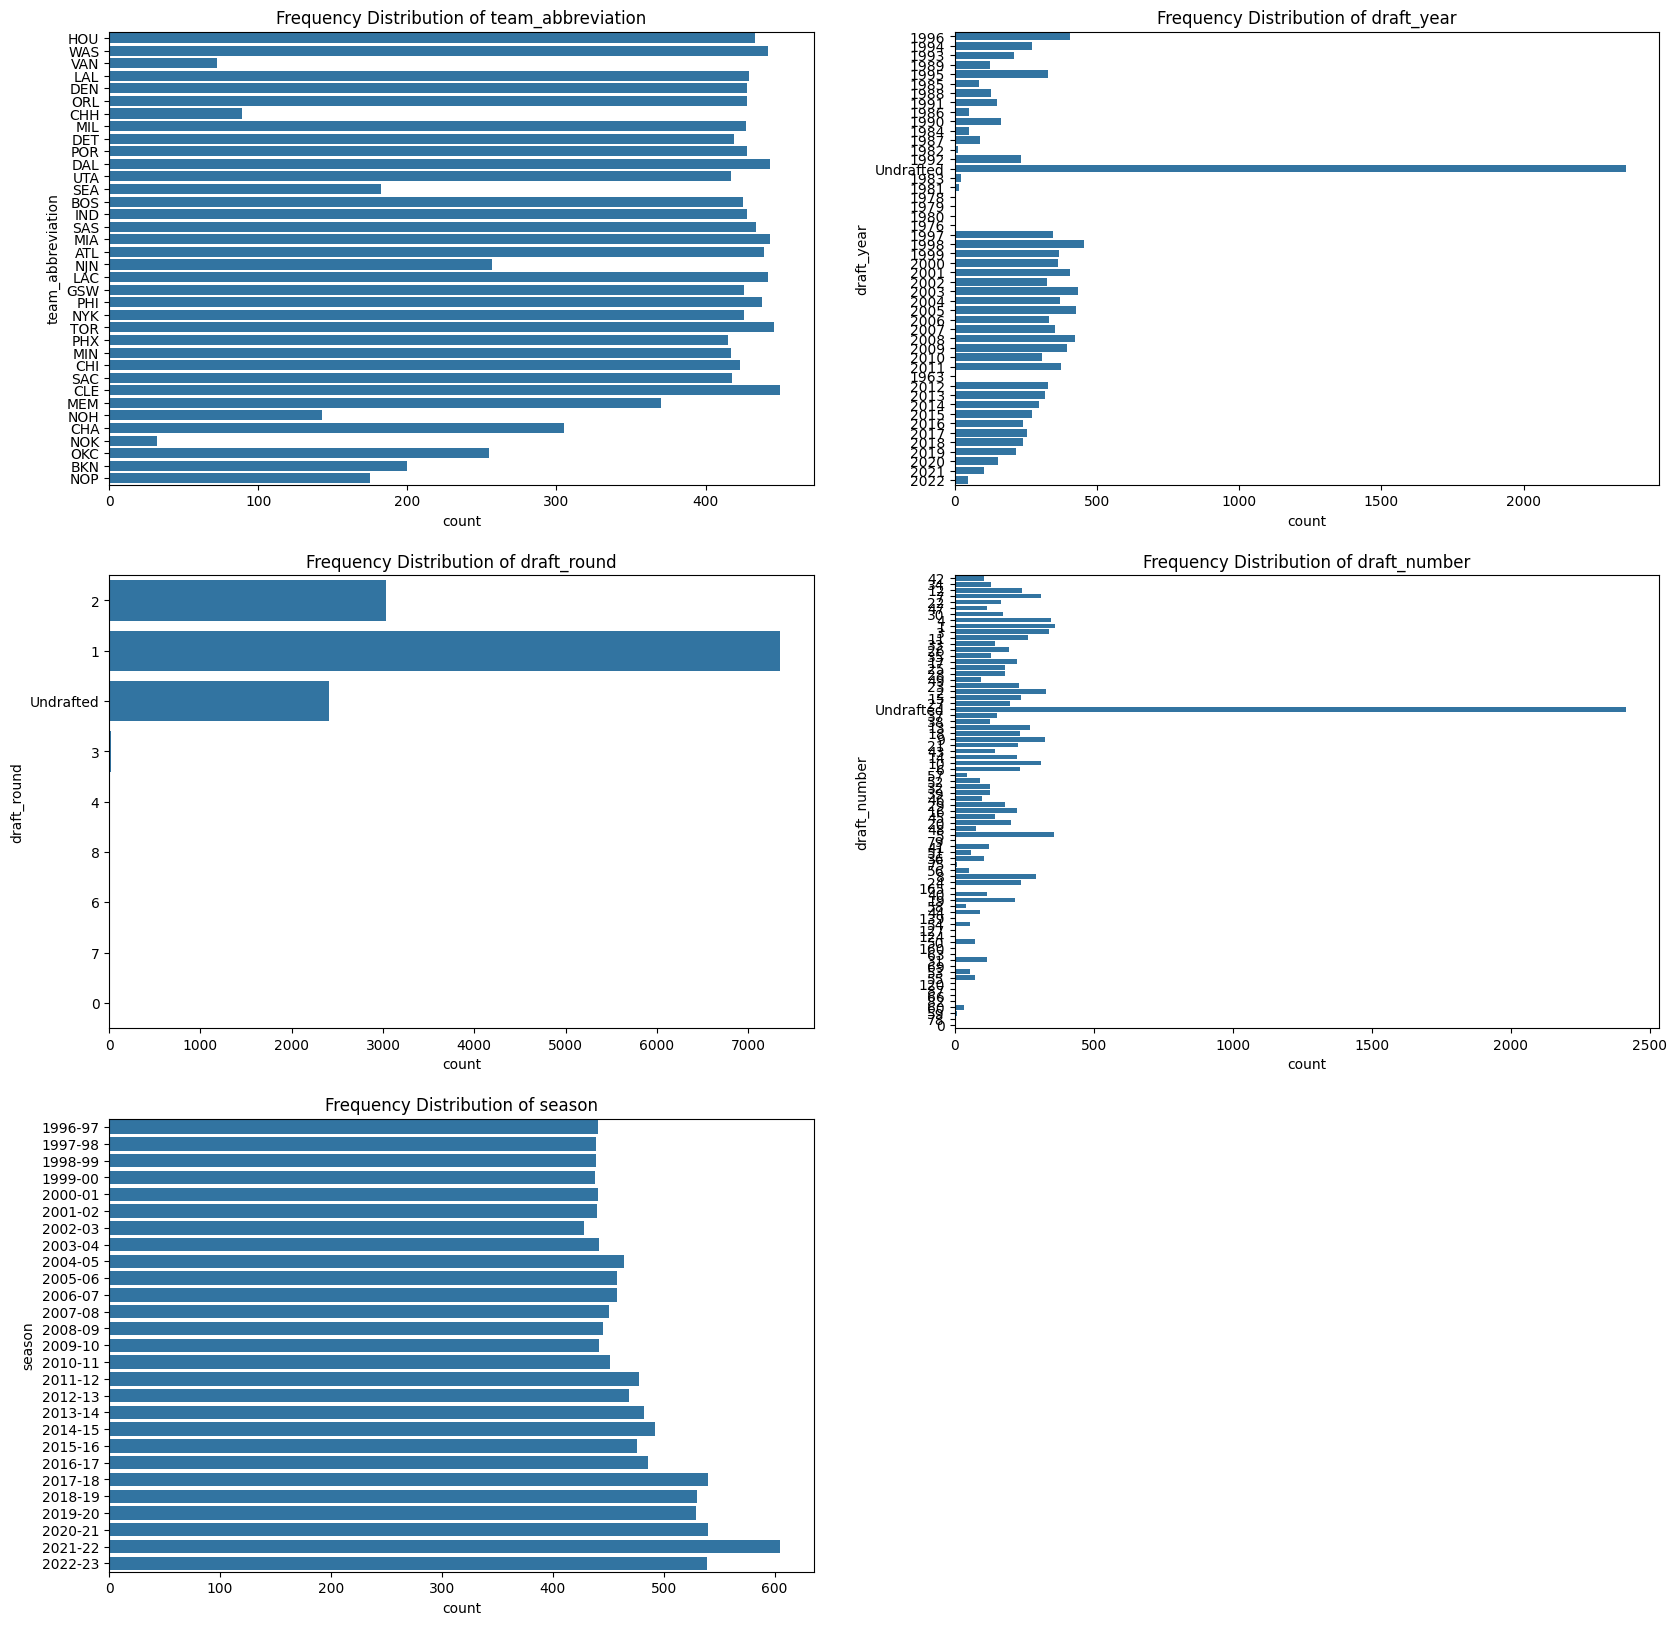

In [17]:
# Frequency distribution of the categorical columns:-

plt.figure(figsize=(20, 20))

chosen_cols = ['team_abbreviation', 'draft_year', 'draft_round', 'draft_number', 'season'] # As 'player_name', 'country' and 'college' have a large number of unique values
i = 1
for col in chosen_cols:
    plt.subplot(3, 2, i)
    sns.countplot(df[col])
    plt.title(f"Frequency Distribution of {col}")
    i += 1
    
plt.show()

# Clearly, the frequency distribution of the categorical columns is quite balanced, except that "Undrafted" players are more in some cases.
# The frequency distribution is pretty much uniform in the 'team_abbreviation' column, and the 'season' column has a balanced distribution as well.
# The 'season' column seems to slightly increase over the years, which is expected.
# While the 'draft_year', 'draft_round', and 'draft_number' columns have a skewed distribution, as expected.

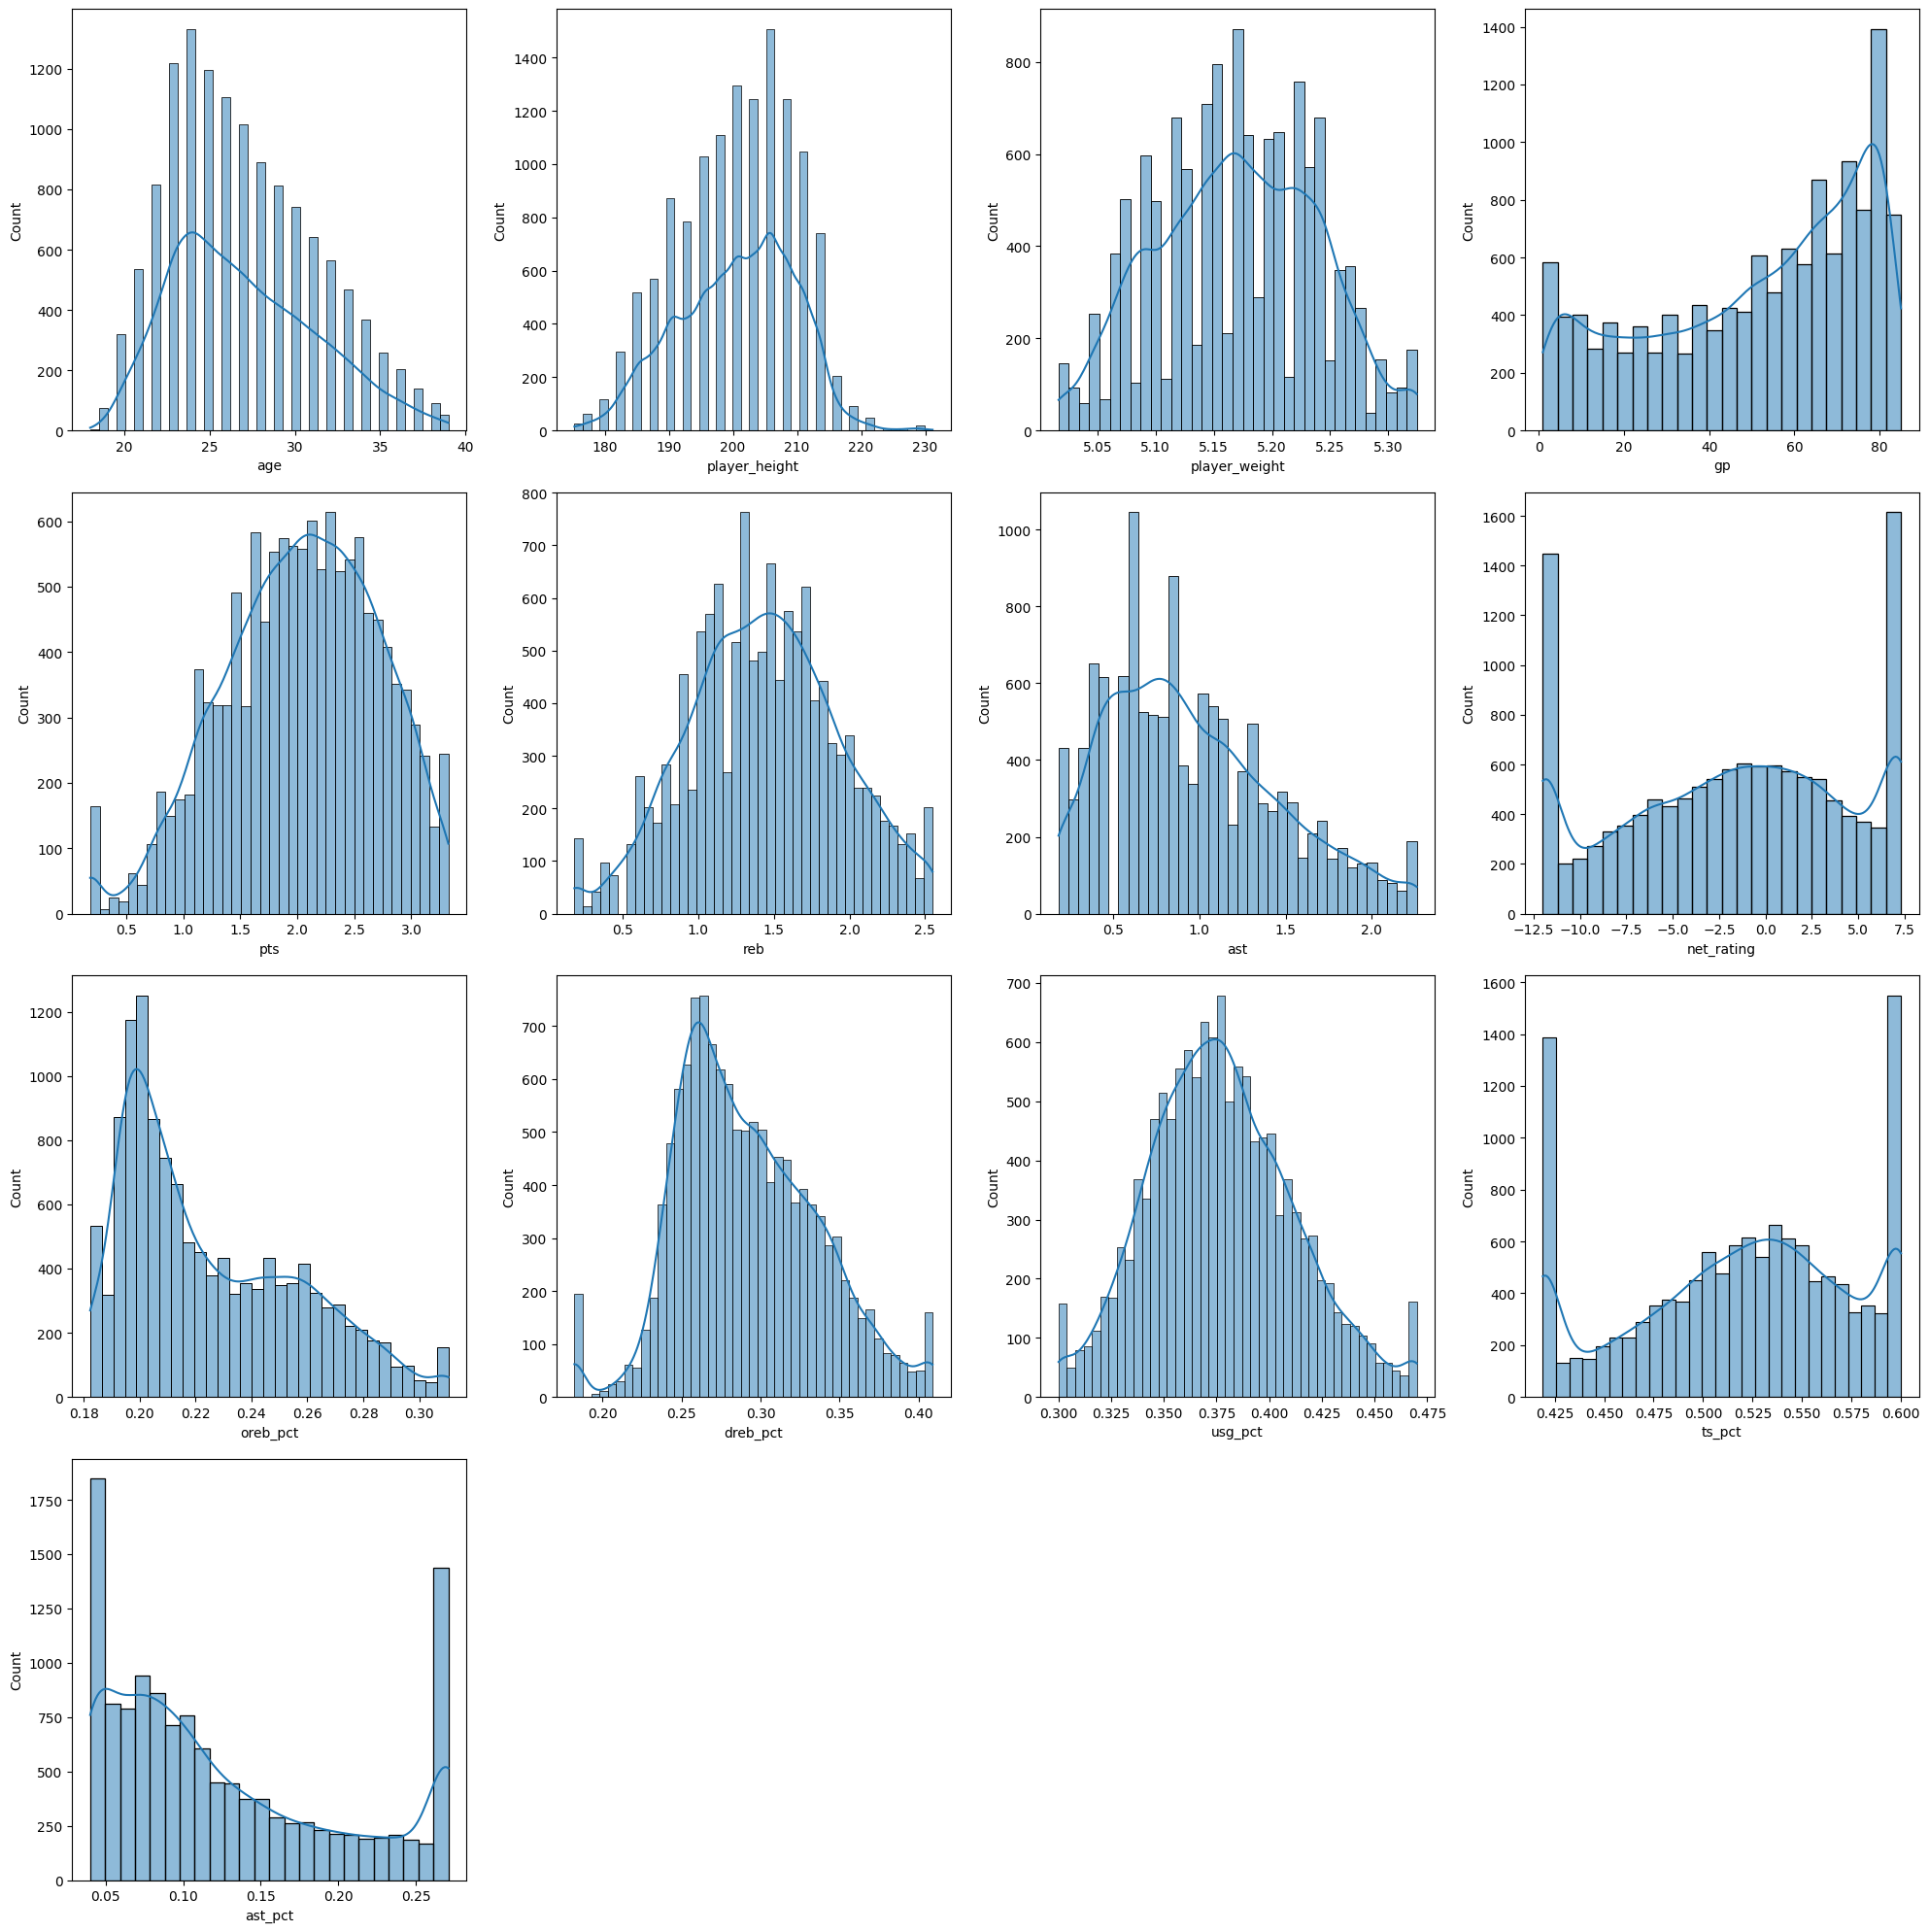

In [18]:
# Let's plot the histogram of the numerical columns, as boxplots have already been plotted:-
plt.figure(figsize=(20, 20))

i = 1
for col in num_cols:
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.xlabel(col)
    i += 1

plt.tight_layout()
plt.show()

# Clearly, the numerical columns are not perfectly normal, and have a slightly skewed distribution.
# The column net_rating is almost normally distributed, except for the ends, due to the outliers.

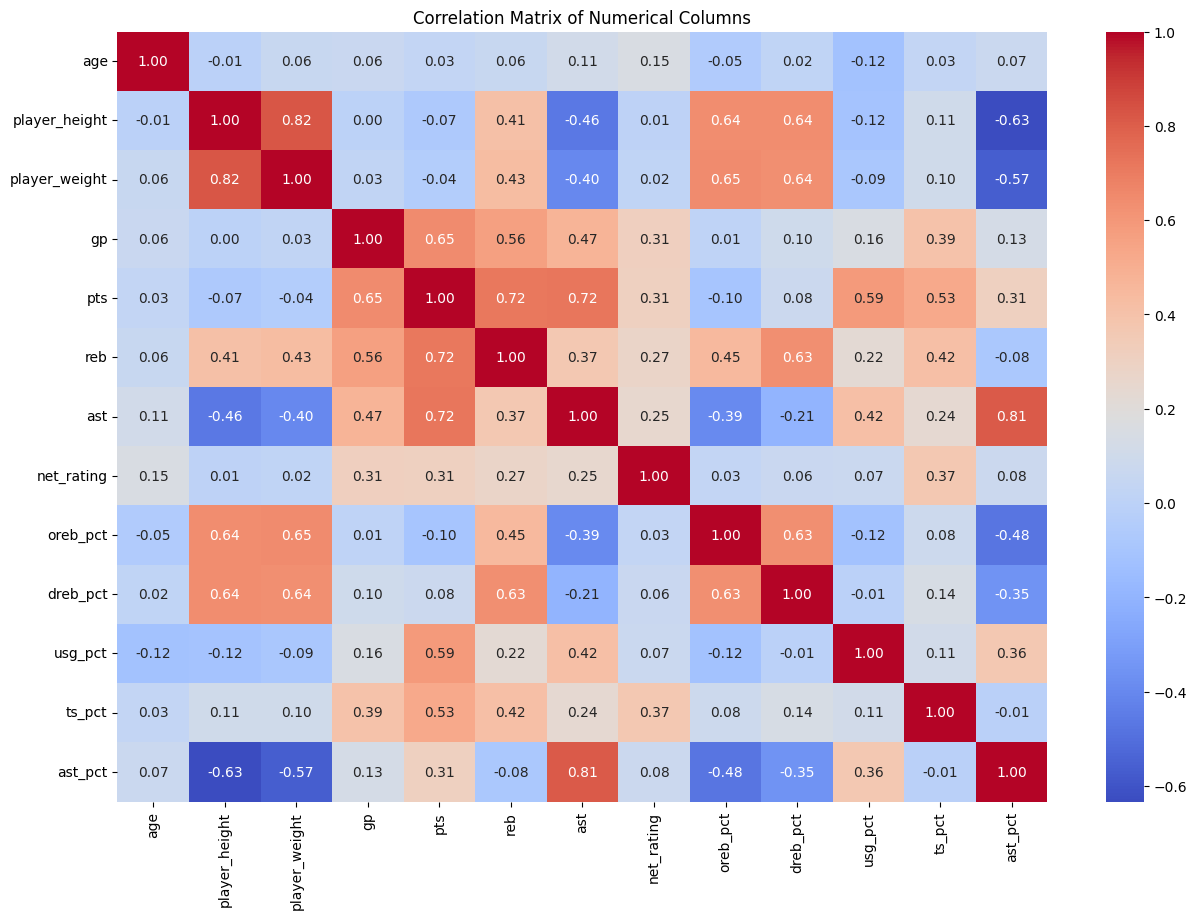

In [19]:
# Let's move on to the Bivariate Analysis:-

# Bivariate Analysis of Numerical Columns:-
# Correlation Matrix of the numerical columns:-
plt.figure(figsize=(15, 10))

# Let's use a heatmap to visualize the correlation matrix better:-
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

# We can observe some interesting correlations between the numerical columns, like:
# - The number of games played (gp) is highly positively correlated with the number of points scored (pts), rebounds (reb), and assists (ast) as expected.
# - The number of points scored (pts) is also highly positively correlated with rebounds (reb) and assists (ast).
# - The number of rebounds (reb) is highly positively correlated with assists (ast).
# - The player_height is highly positively correlated with player_weight, which is quite intuitive.
# - the player height is positively correlated with the oreb_pct(Offensive Rebound Percentage) and defensive rebound percentage(dreb_pct), which is quite intuitive.
# - The player weight is negatively correlated with ast(assists), ast_pct(assist percentage), which is quite intuitive.


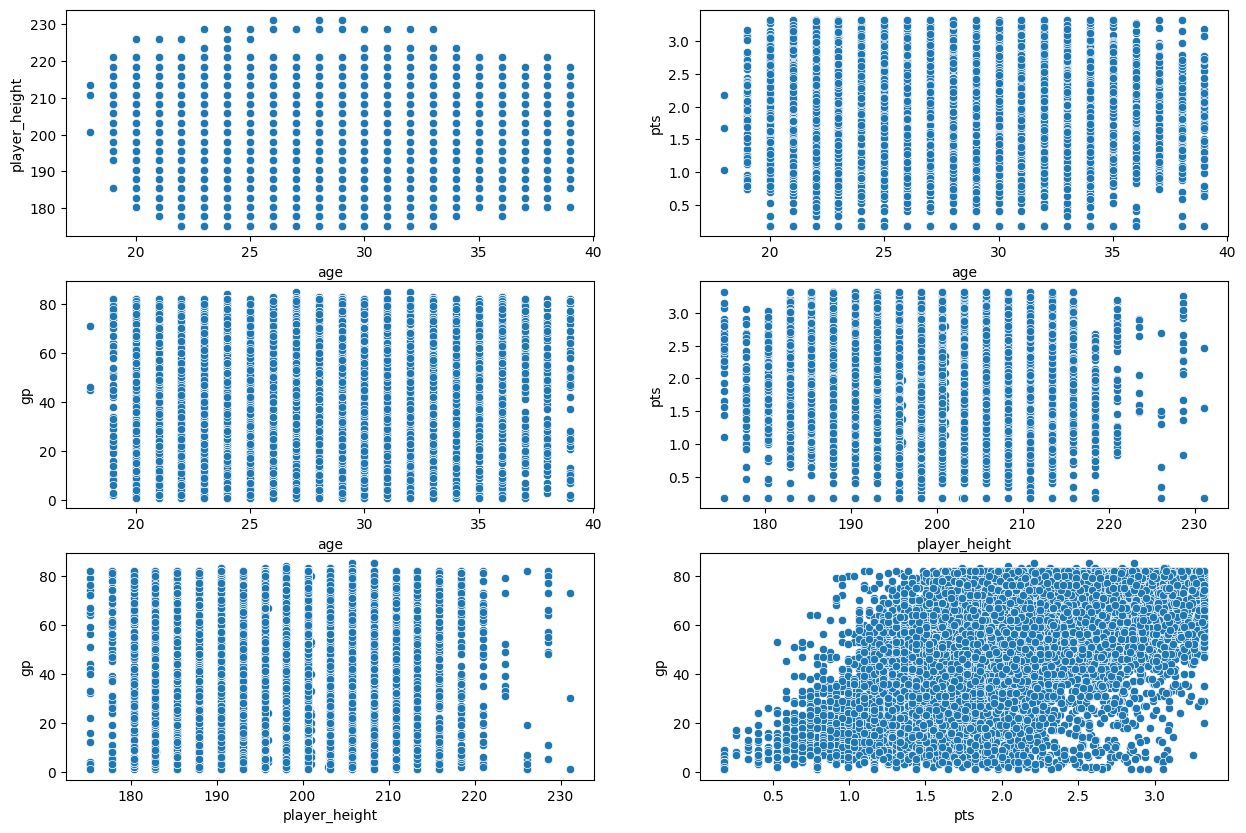

In [20]:
# Scatterplot of the numerical columns:-
# Let's choose a few numerical columns for the pairplot, as all the columns will make the plot too crowded.
# We will choose the columns 'age', 'player_height', 'pts', 'ast', 'oreb_pct' for the pairplot.
chosen_cols = ['age', 'player_height', 'pts', 'gp']

plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.scatterplot(x='age', y='player_height', data=df)
plt.subplot(3, 2, 2)
sns.scatterplot(x='age', y='pts', data=df)
plt.subplot(3, 2, 3)
sns.scatterplot(x='age', y='gp', data=df)
plt.subplot(3, 2, 4)
sns.scatterplot(x='player_height', y='pts', data=df)
plt.subplot(3, 2, 5)
sns.scatterplot(x='player_height', y='gp', data=df)
plt.subplot(3, 2, 6)
sns.scatterplot(x='pts', y='gp', data=df)
plt.show()

# Clearly, the plots suggest that the numerical columns are not perfectly linearly correlated


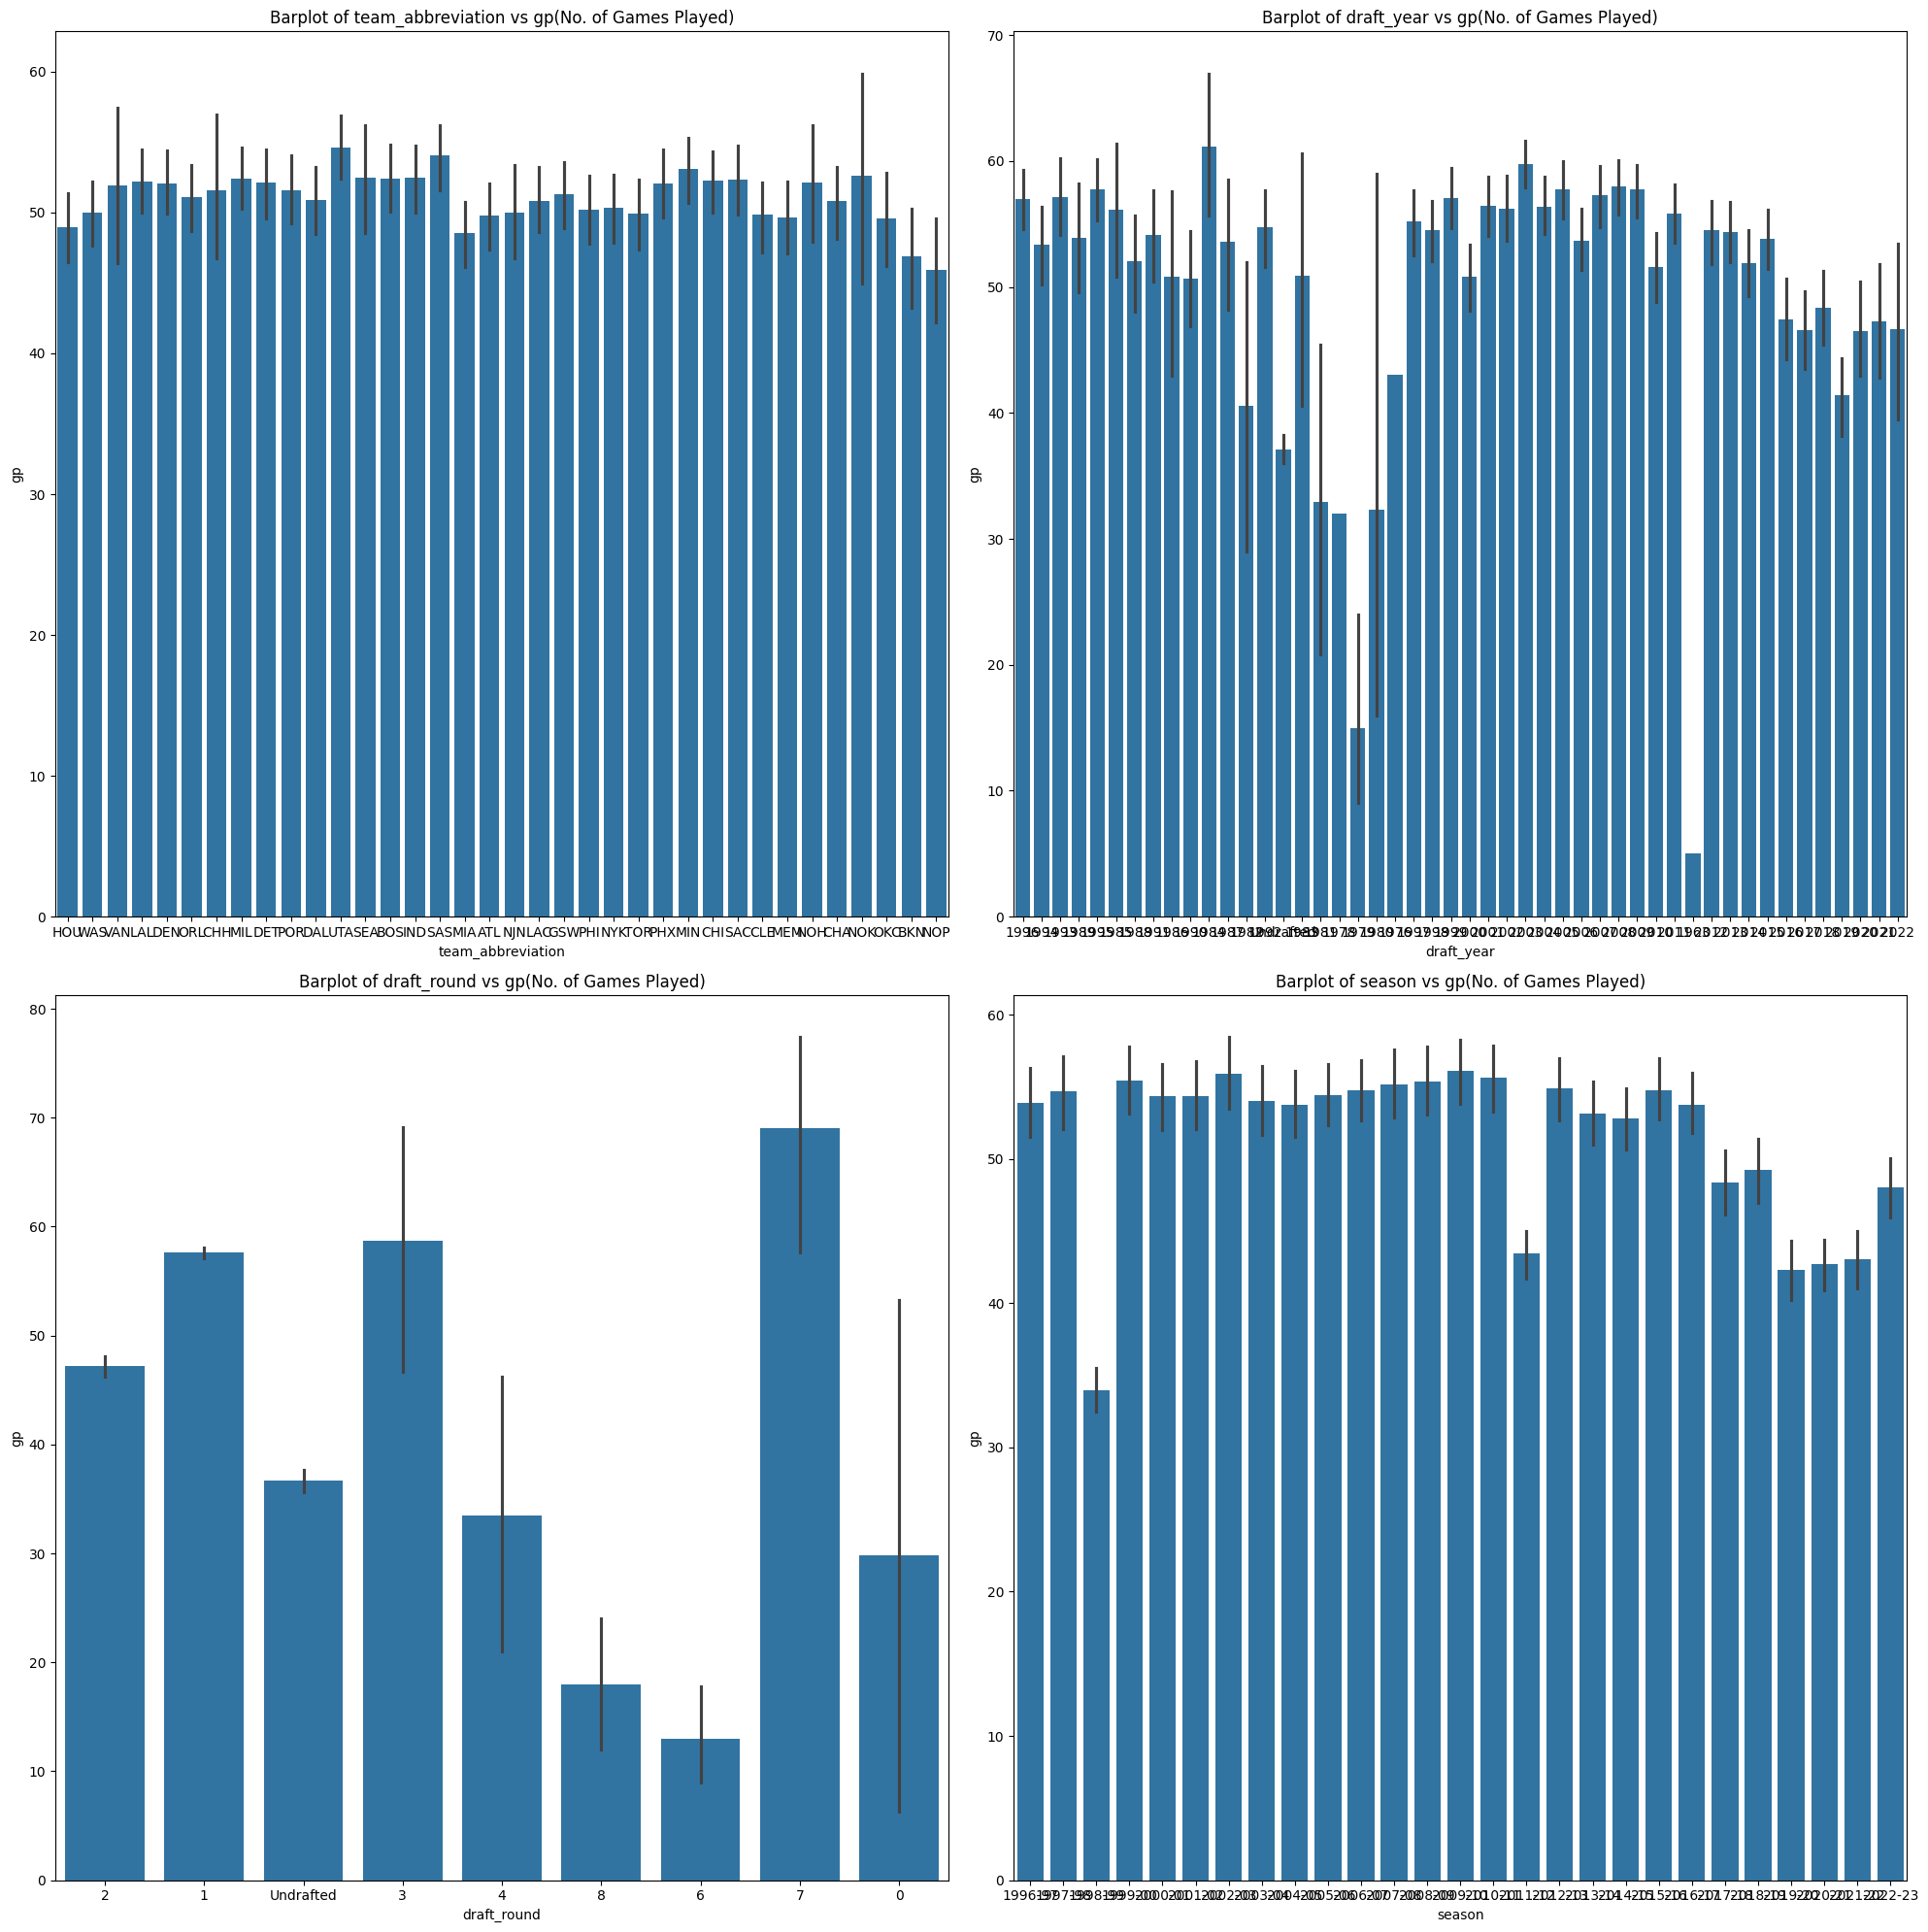

In [21]:
# Barplot of the categorical columns:-
plt.figure(figsize=(20, 20))

i = 1
chosen_cols = ['team_abbreviation', 'draft_year',
       'draft_round', 'season']
for col in chosen_cols:
    plt.subplot(2, 2, i)
    sns.barplot(x=col, y='gp', data=df)
    plt.title(f"Barplot of {col} vs gp(No. of Games Played)")
    i += 1

plt.tight_layout()
plt.show()

# The barplots are pretty much uniform, except for the 'draft_round' column, which is a bit uneven.
# The 'team_abbreviation' column has a balanced distribution, and the 'season' column
# has a slightly decreasing trend, quite contrary to intuition.

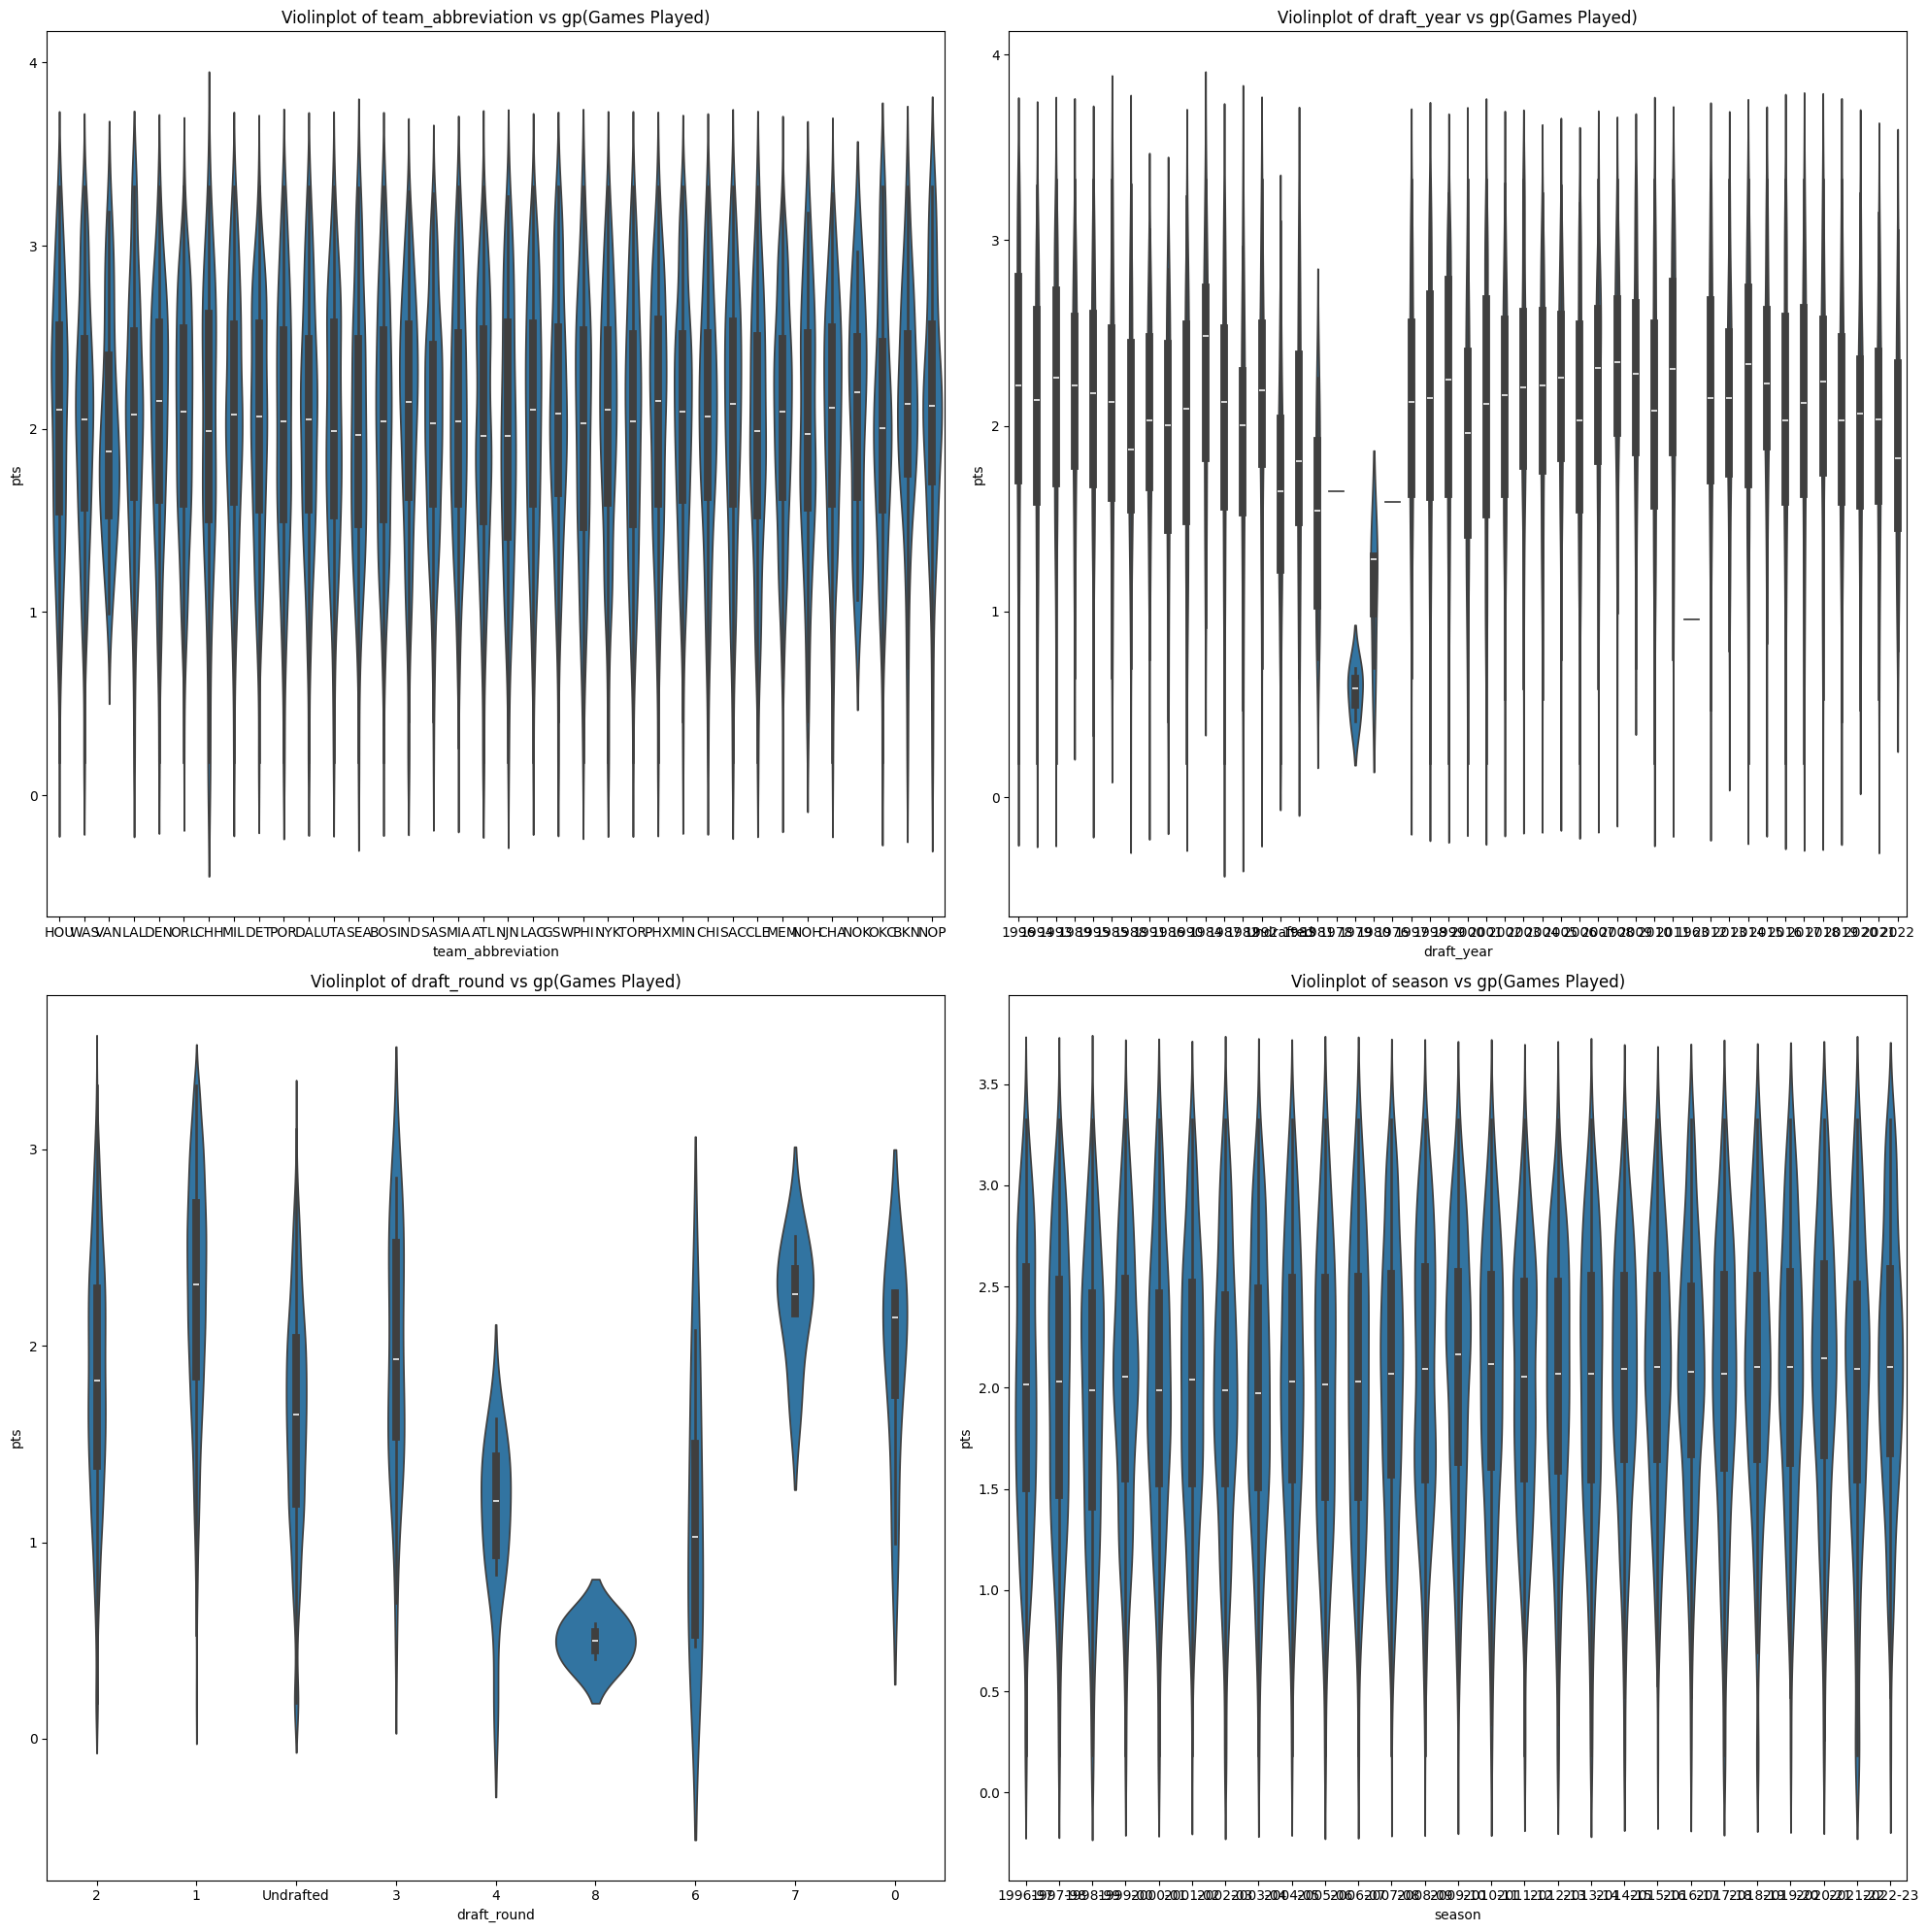

In [22]:
# Violinplot of the categorical columns:-

plt.figure(figsize=(20, 20))

i = 1
chosen_cols = ['team_abbreviation', 'draft_year',
       'draft_round', 'season']
for col in chosen_cols:
    plt.subplot(2, 2, i)
    sns.violinplot(x=col, y='pts', data=df)
    plt.title(f"Violinplot of {col} vs gp(Games Played)")
    i += 1
    
plt.tight_layout()
plt.show()

# Clearly, the barplots and violinplots suggest that the categorical columns are not perfectly linearly correlated with the numerical columns.
# The columns team_abbreviation, draft_year have a wide range of values, and hence, the distribution is not very clear.
# The columns draft_round and season have a relatively smaller range of values, and hence, the distribution is clearer.
# But overall, the distribution is 

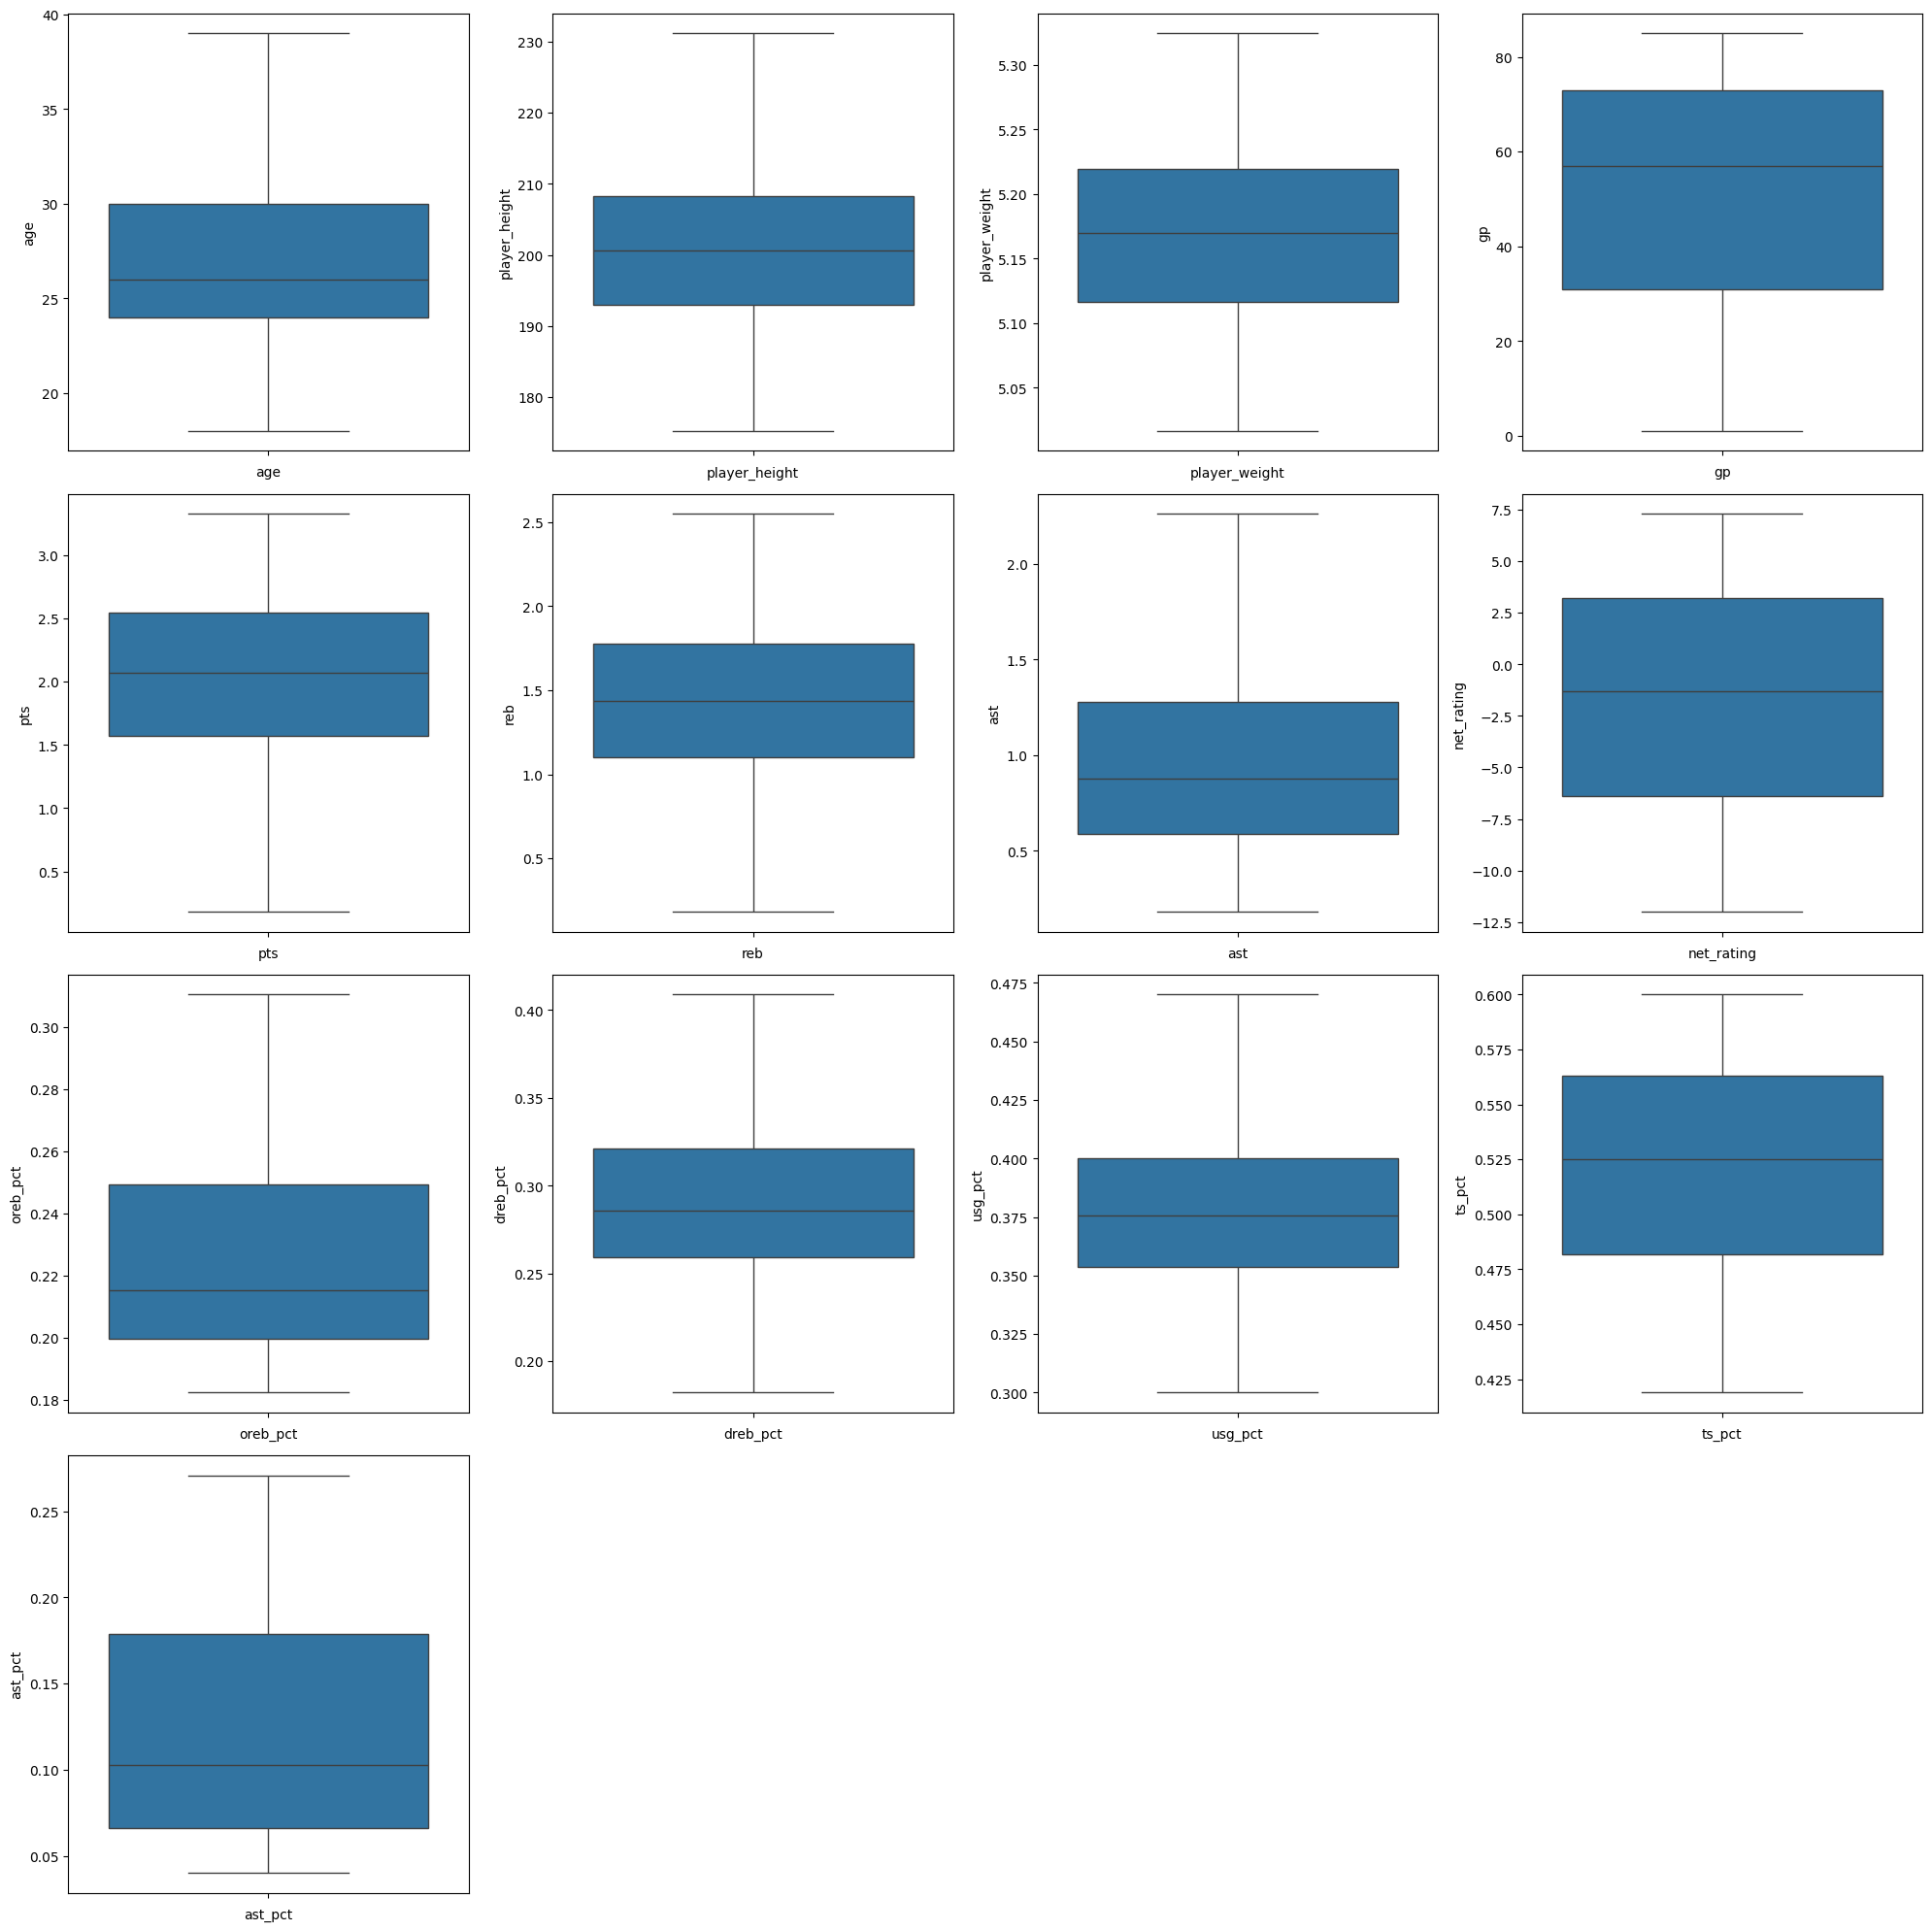

In [23]:
# Although the box plots were plotted in the outlier detection step, we will plot them again.

# Boxplot of the numerical columns:-
plt.figure(figsize=(20, 20))

i = 1
for col in num_cols:
    plt.subplot(4, 4, i)
    sns.boxplot(df[col])
    plt.xlabel(col)
    i += 1
    
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

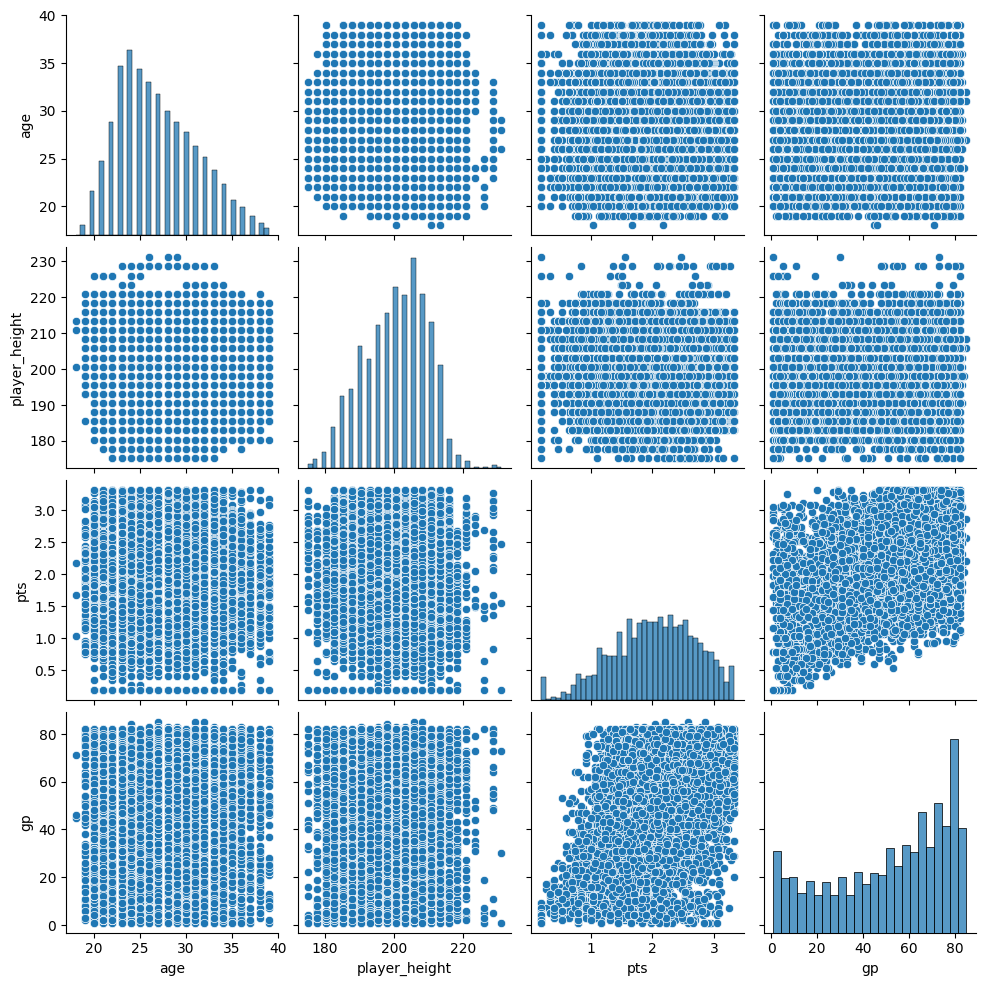

In [24]:
# Let's move on to the Multivariate Analysis:-

# Multivariate Analysis of Numerical Columns:-
# Pairplot of the numerical columns:-
chosen_cols = ['age', 'player_height', 'pts', 'gp']

plt.figure(figsize=(15, 10))
sns.pairplot(df[chosen_cols])
plt.show()

# As analyzed earlier, the numerical columns are not perfectly linearly correlated, and the pairplot confirms the same.


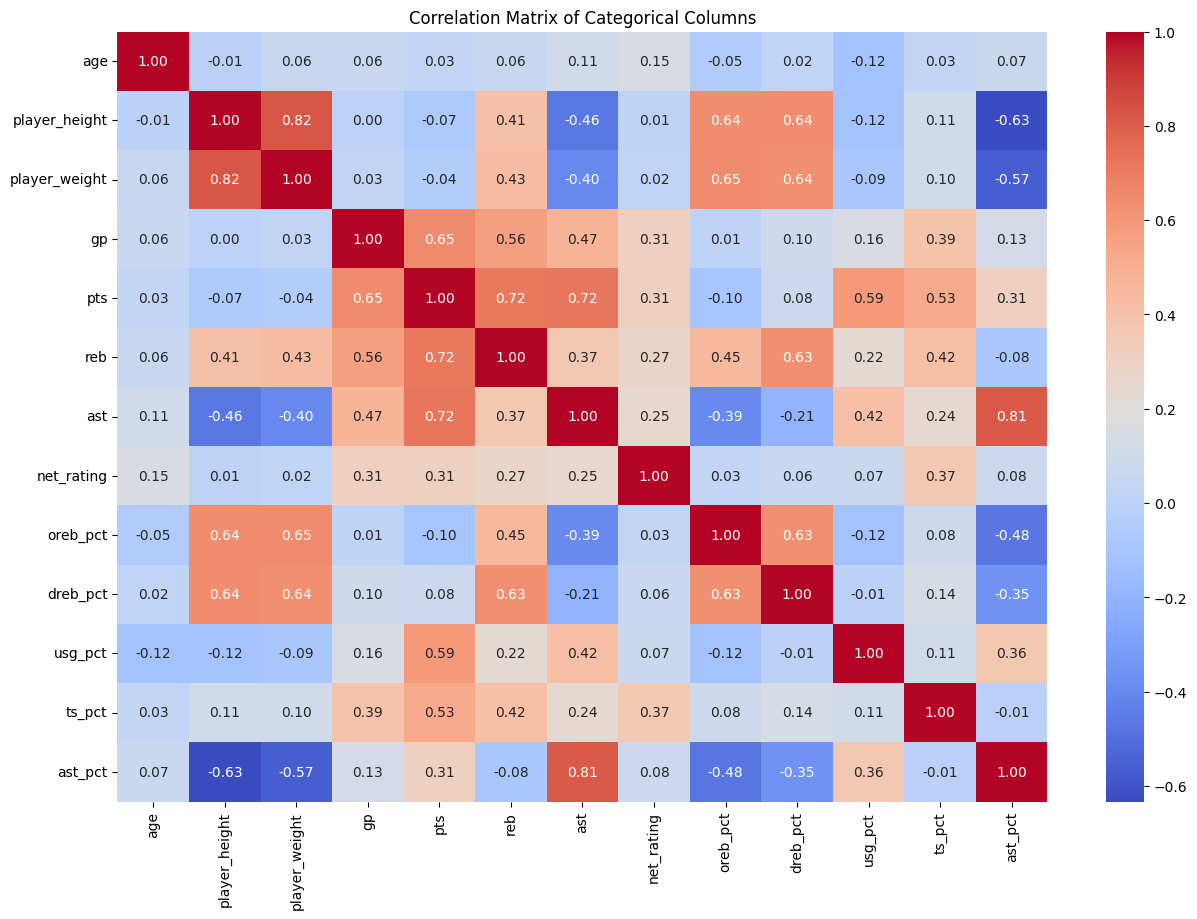

In [25]:
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Categorical Columns")
plt.show()

# As analyzed earlier, the numerical columns are not perfectly linearly correlated, and the heatmap confirms the same.


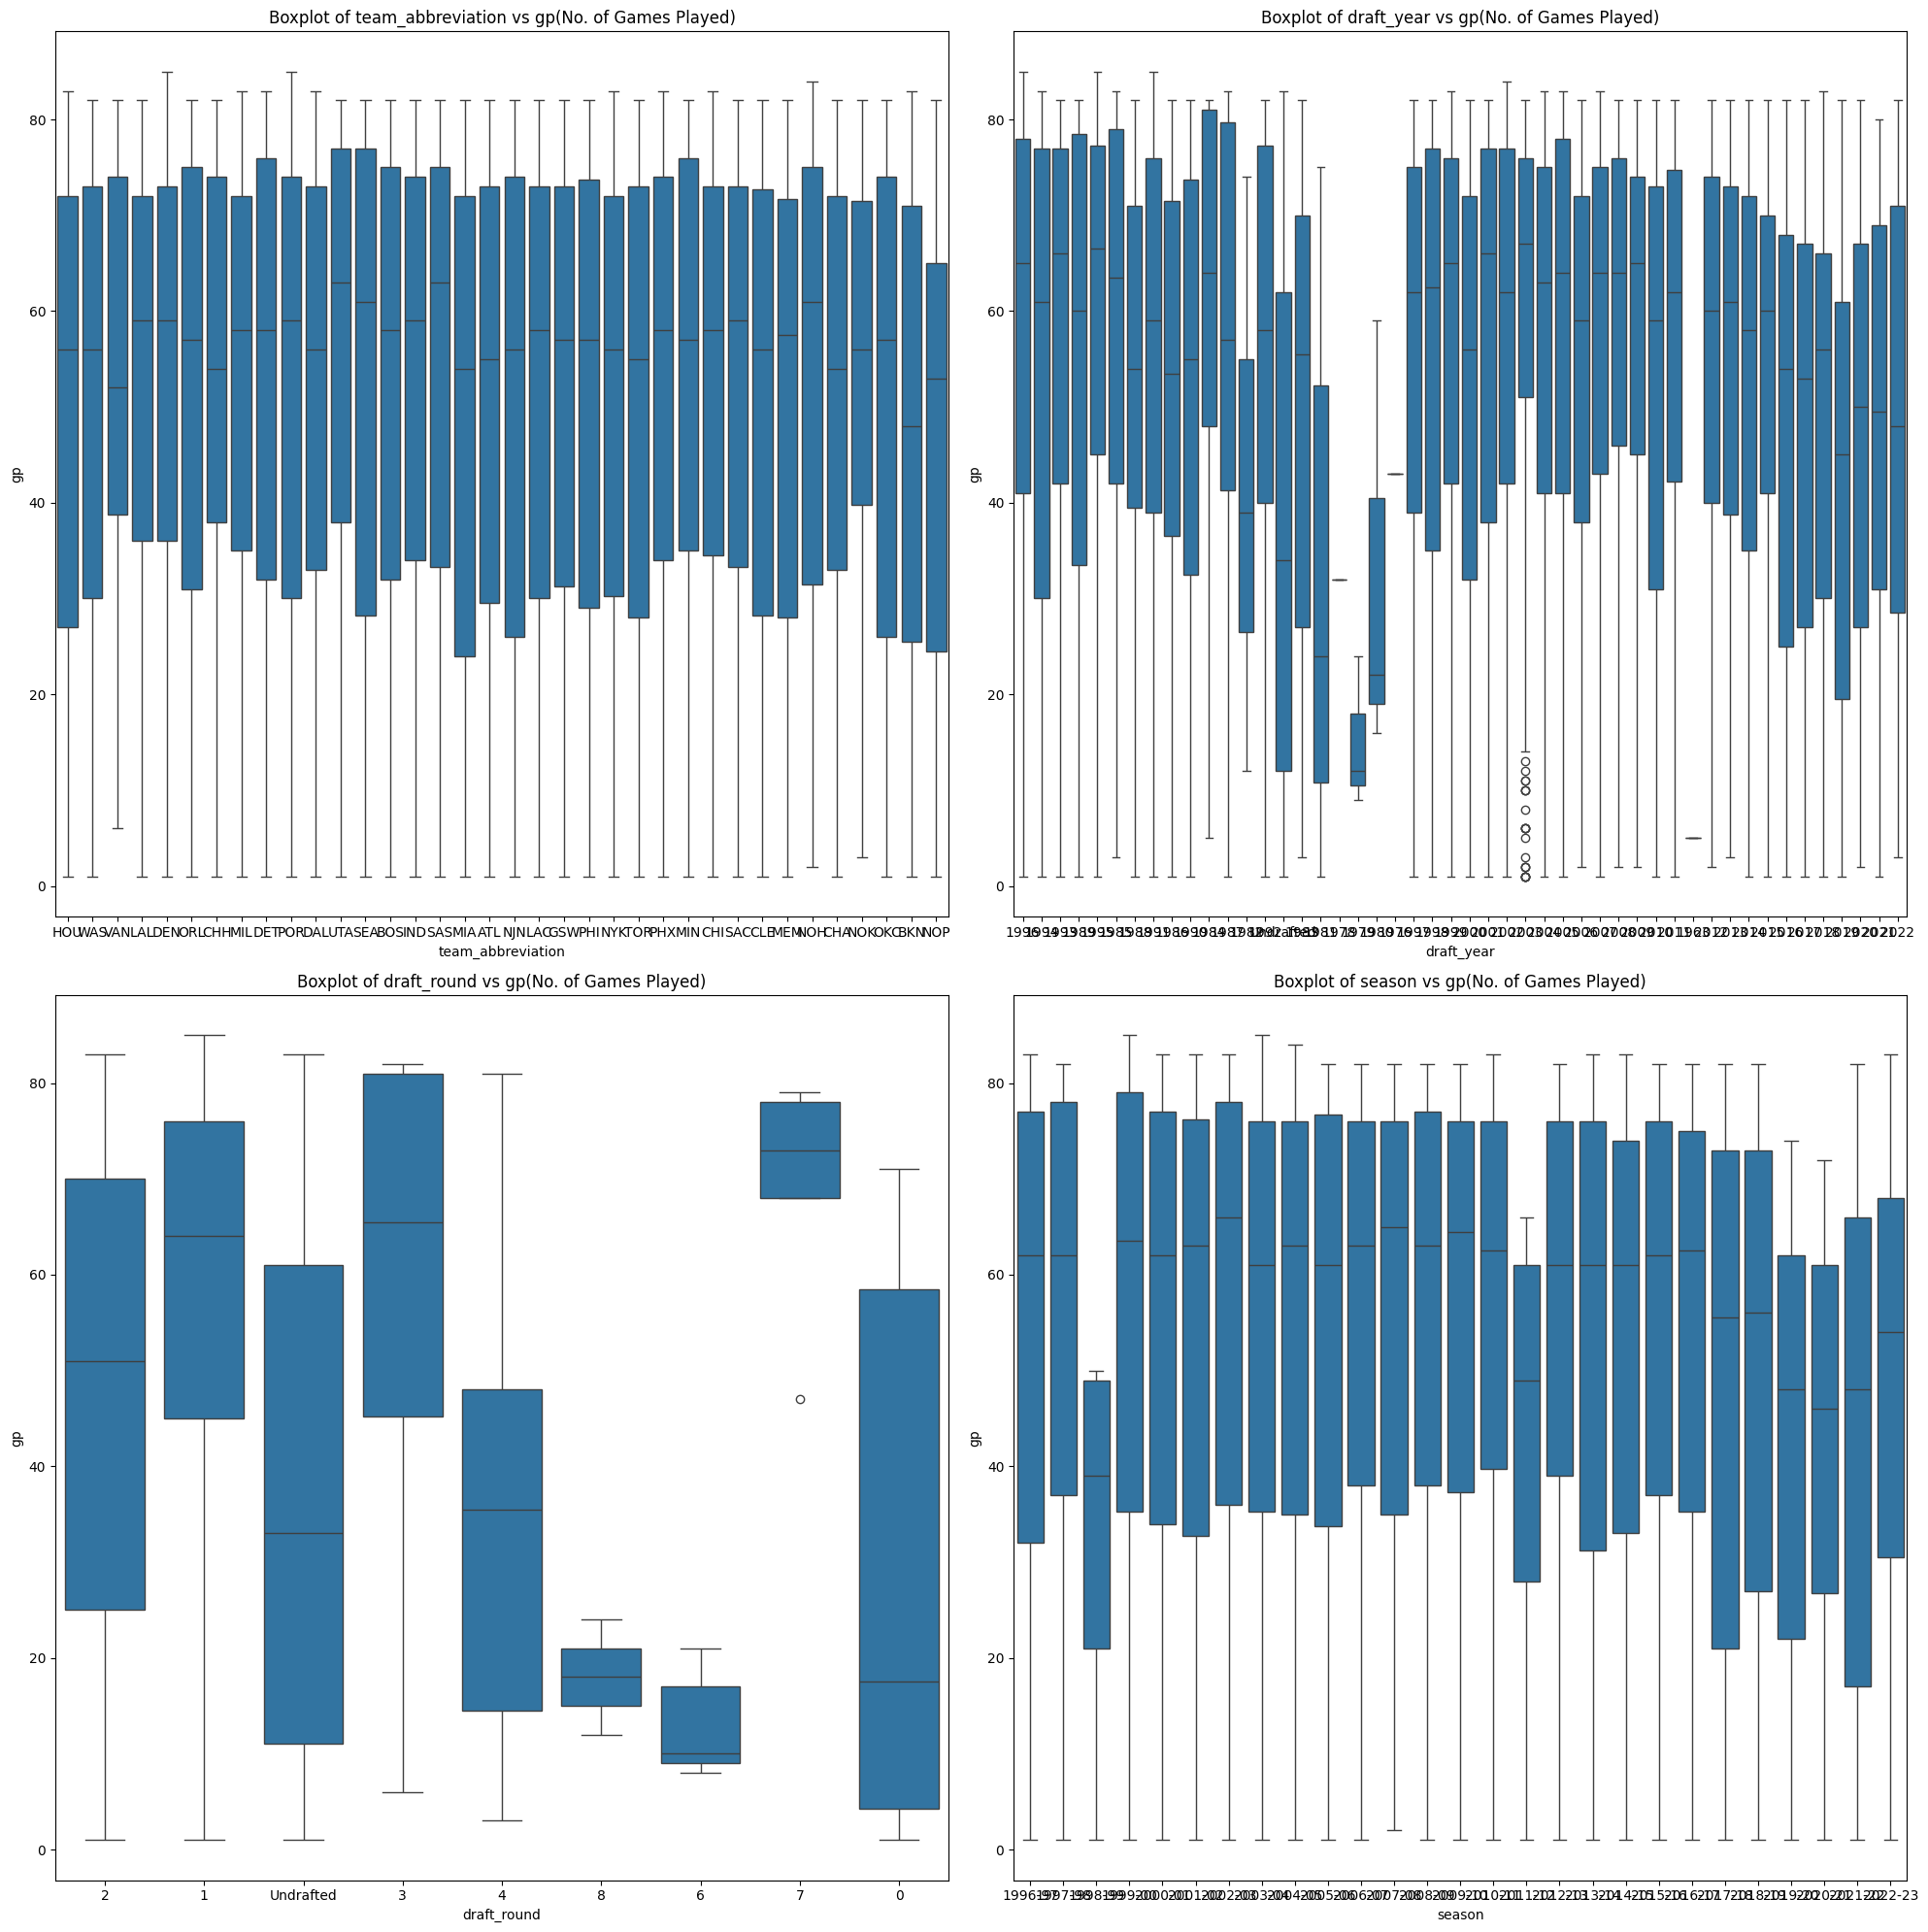

In [26]:
# Combined Multivariate Analysis of Categorical Columns:-
# We will use the boxplot to analyze the relationship between the categorical columns and the numerical column 'gp'(No. of Games Played).

plt.figure(figsize=(20, 20))

i = 1
chosen_cols = ['team_abbreviation', 'draft_year',
       'draft_round', 'season']
for col in chosen_cols:
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='gp', data=df)
    plt.title(f"Boxplot of {col} vs gp(No. of Games Played)")
    i += 1
    
plt.tight_layout()
plt.show()


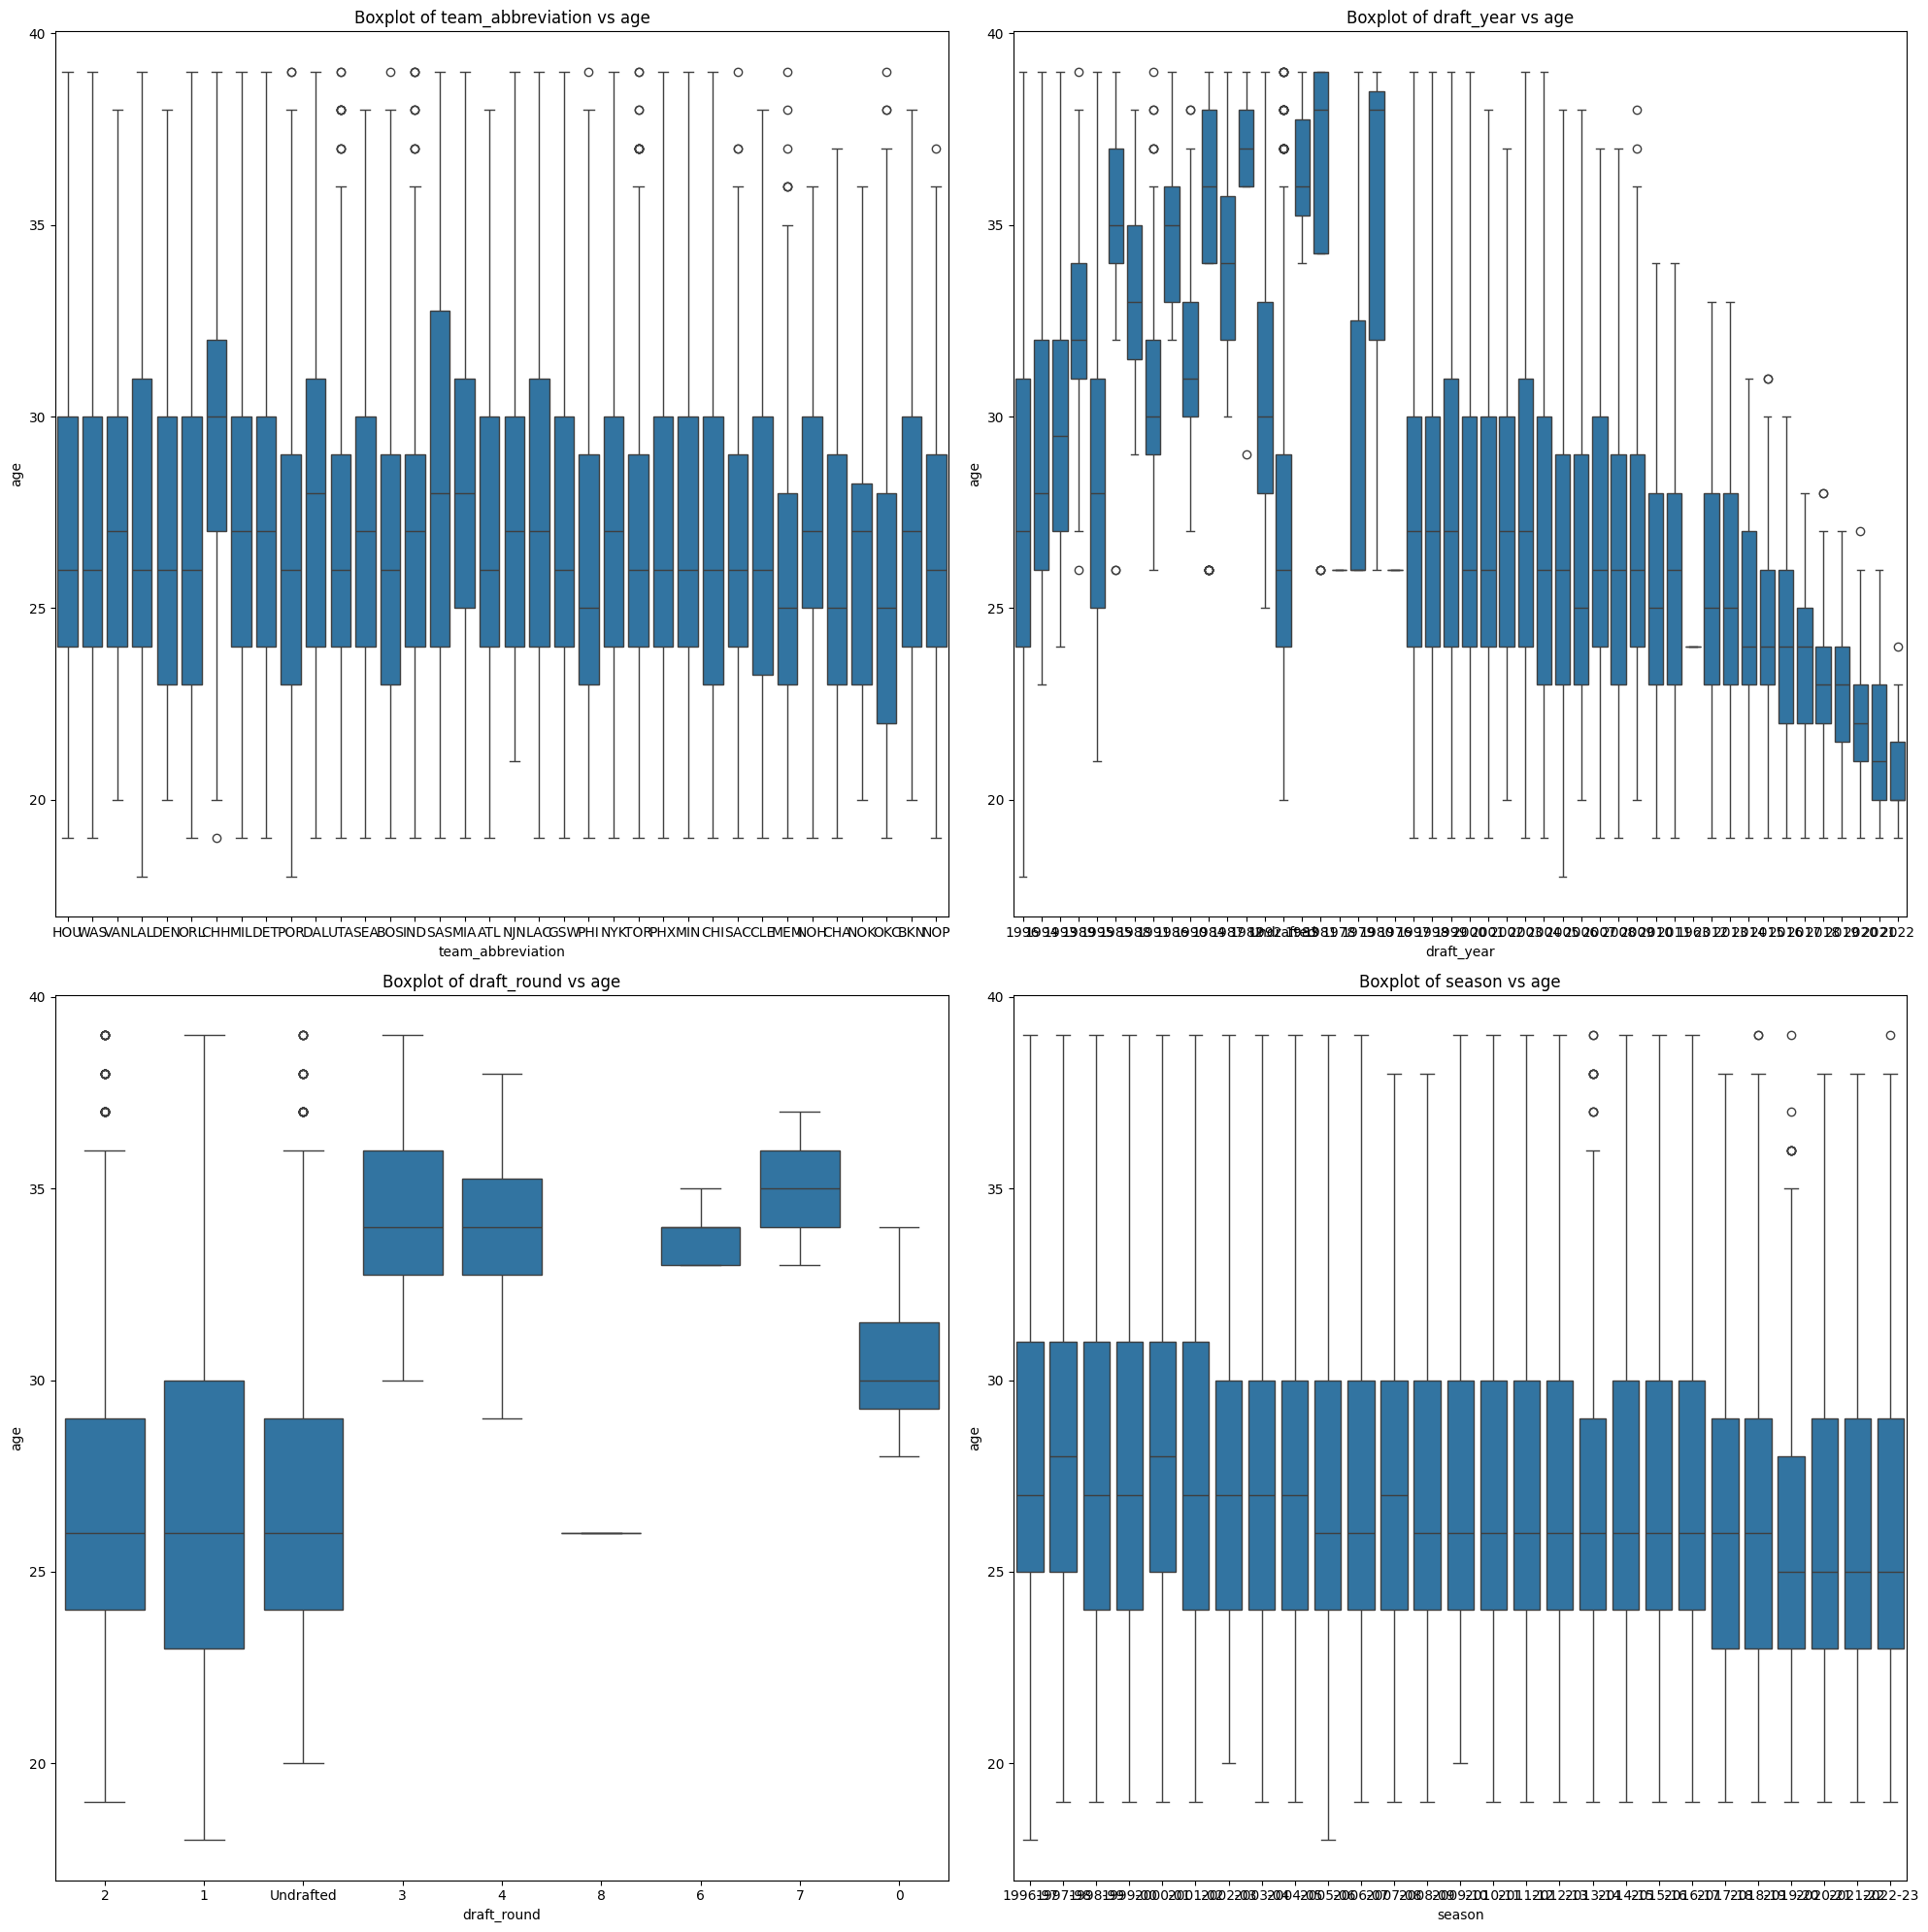

In [27]:
# Combined Multivariate Analysis of Categorical Columns:-
# We will use the boxplot to analyze the relationship between the categorical columns and the numerical column 'age'

plt.figure(figsize=(20, 20))

i = 1
chosen_cols = ['team_abbreviation', 'draft_year',
       'draft_round', 'season']
for col in chosen_cols:
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='age', data=df)
    plt.title(f"Boxplot of {col} vs age")
    i += 1
    
plt.tight_layout()
plt.show()


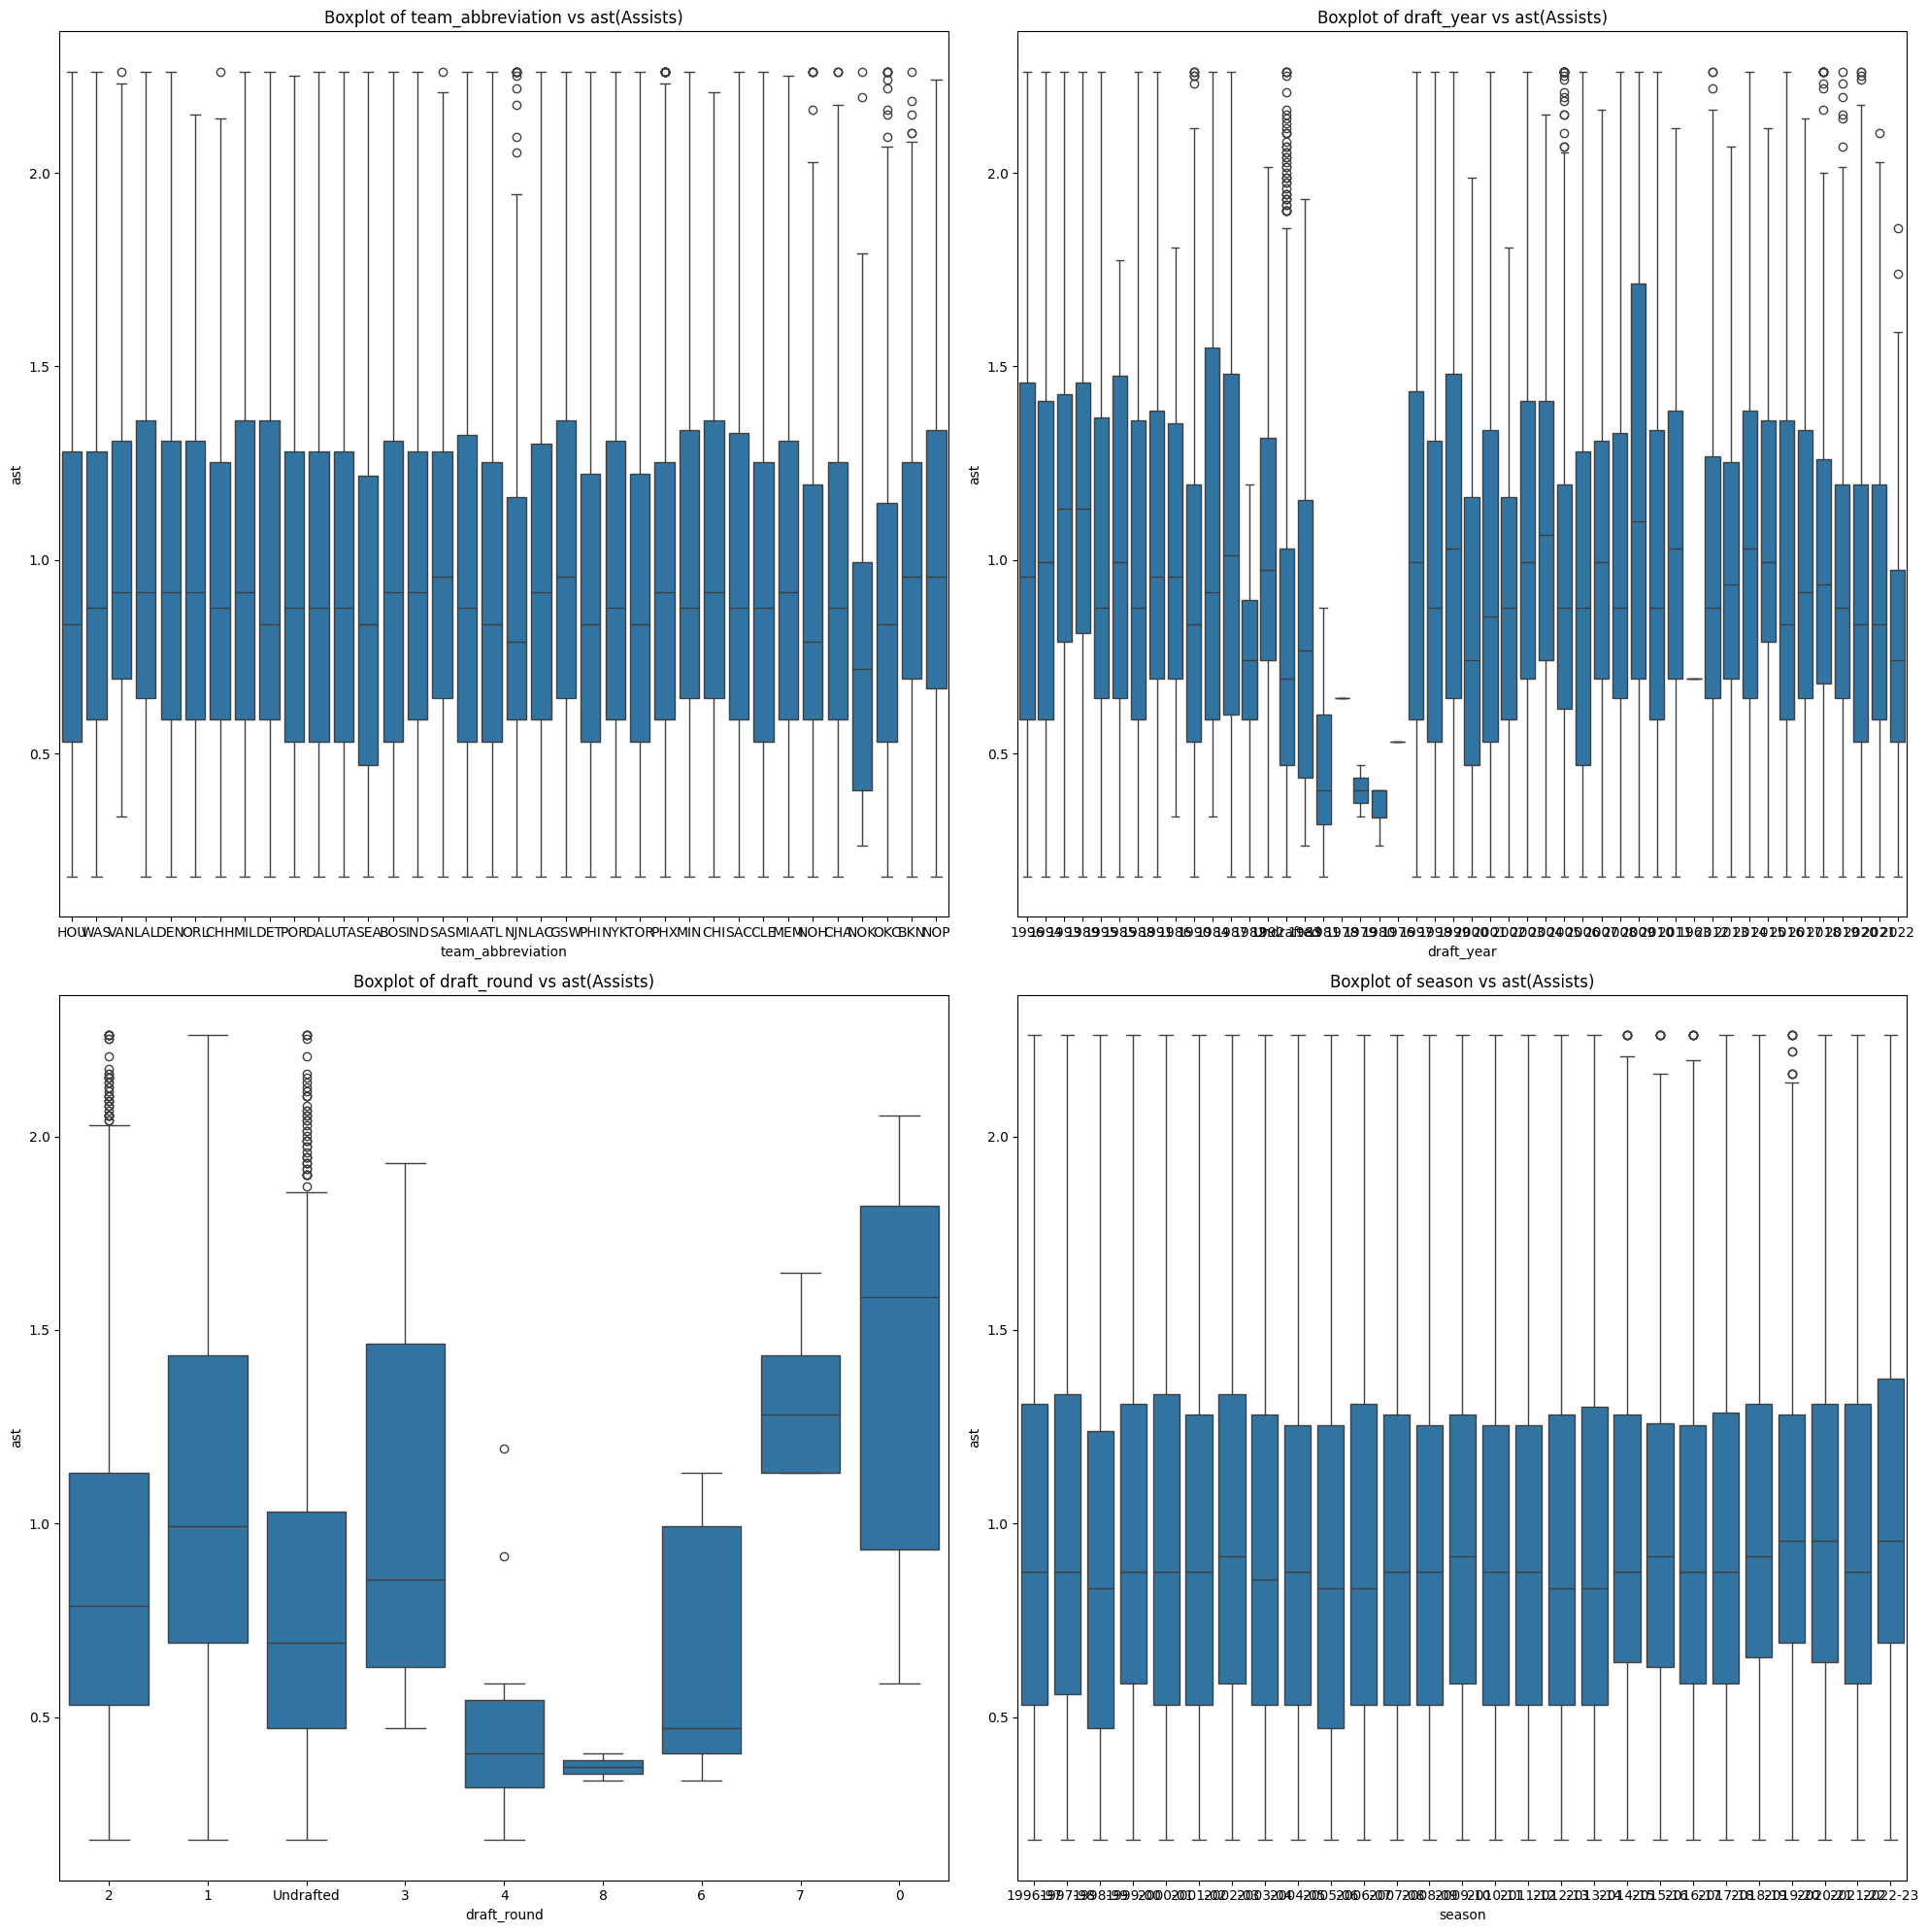

In [28]:
# Combined Multivariate Analysis of Categorical Columns:-
# We will use the boxplot to analyze the relationship between the categorical columns and the numerical column 'ast'

plt.figure(figsize=(20, 20))

i = 1
chosen_cols = ['team_abbreviation', 'draft_year',
       'draft_round', 'season']
for col in chosen_cols:
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='ast', data=df)
    plt.title(f"Boxplot of {col} vs ast(Assists)")
    i += 1
    
plt.tight_layout()
plt.show()


In [29]:
# The boxplots again like before suggest that the categorical columns are not perfectly linearly correlated with the numerical columns.